<a href="https://colab.research.google.com/github/Gi-Woong/SDA-TeamProject/blob/main/SDA_Term_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [45]:
# 한글폰트 설정
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf
# 실행 후 런타임 다시시작

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 20 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent

In [46]:
#visualization
import matplotlib as mpl
import matplotlib.pylab as plb
import matplotlib.pyplot as plt

# 브라우저에서 바로 그려지도록(colab)
%matplotlib inline

# 그래프에 retina format 적용
%config InlineBackend.figure_format = 'retina'

# Colab 의 한글 폰트 설정
plt.rc('font', family='NanumBarunGothic') 

# 유니코드에서  음수 부호설정
mpl.rc('axes', unicode_minus=False)

# sns.set() 쓰지 말것! -> 폰트 지정 옵션 초기화돼서 한글폰트 깨짐

In [47]:
import pandas as pd
import numpy as np
import seaborn as sns
# import matplotlib as mpl
# import matplotlib.pyplot as plt


# 데이터 불러오기 및 사전 처리

- 사용 데이터
    - 재정 자립도
    - 재정 자주도
- 기타 고려 변수
    - 과징금 및 과태료

DataFrame 변수 명
 
- df1: 서울시 구별 조사망률 및 사망건수(2015~2021)
- df2: 일반회계 세입결산(과태료 및 과징금)(2015~2021)
- df3: 서울시 구별 재정자립도
- df4: 서울시 구별 재정자주도

In [48]:
def read_excel(url, **kwargs):
    return pd.read_excel(url, engine='openpyxl', header=None, **kwargs)

# 서울시 구별 조사망률
df_1 = read_excel("https://github.com/mjuppp1/SDA2022/blob/main/data/%EC%82%AC%EB%A7%9D%EB%A5%A0%EB%8D%B0%EC%9D%B4%ED%84%B0.xlsx?raw=true")
# 과징금 데이터
df_2 = read_excel("https://github.com/mjuppp1/SDA2022/blob/main/data/%EA%B3%BC%EC%A7%95%EA%B8%88%EB%8D%B0%EC%9D%B4%ED%84%B0.xlsx?raw=true")
# 서울시 구별 재정자립도
df_3 = read_excel("https://github.com/mjuppp1/SDA2022/blob/main/data/%EC%9E%AC%EC%A0%95%EC%9E%90%EB%A6%BD%EB%8F%84.xlsx?raw=true")
# 서울시 구별 재정자주도
df_4 = read_excel("https://github.com/mjuppp1/SDA2022/blob/main/data/%EC%9E%AC%EC%A0%95%EC%9E%90%EC%A3%BC%EB%8F%84.xlsx?raw=true")

# EDA 및 데이터 전처리

### 서울시 구별 조사망률 및 사망건수

In [49]:
df_1.head()

0        1     2     3     4     5     6     7     8     9     10  \
0      NaN     자치구별  2015  2015  2016  2016  2017  2017  2018  2018  2019   
1  자치구별(1)  자치구별(2)  사망건수  조사망률  사망건수  조사망률  사망건수  조사망률  사망건수  조사망률  사망건수   
2       합계      종로구   829   5.5   823   5.5   826   5.6   897     6   854   
3      NaN       중구   689   5.6   669   5.5   684   5.7   710   5.8   665   
4      NaN      용산구  1113   4.9  1137   5.1  1150   5.2  1203   5.5  1107   

     11    12    13    14    15  
0  2019  2020  2020  2021  2021  
1  조사망률  사망건수  조사망률  사망건수  조사망률  
2   5.8   867     6   982   6.9  
3   5.5   723   5.9   806   6.7  
4   5.1  1145   5.2  1265   5.8

In [50]:
df_1 = df_1.T
df_1.columns = ["연도", "수치명"] + list(df_1.iloc[1][2:])
df_1 = df_1.iloc[2:]
df_1

연도   수치명  종로구   중구   용산구   성동구   광진구  동대문구   중랑구   성북구  ...   강서구   구로구  \
2   2015  사망건수  829  689  1113  1244  1472  1833  2050  2154  ...  2573  1731   
3   2015  조사망률  5.5  5.6   4.9   4.3   4.1   5.2     5   4.7  ...   4.4   4.1   
4   2016  사망건수  823  669  1137  1304  1344  1921  2013  2139  ...  2594  1794   
5   2016  조사망률  5.5  5.5   5.1   4.5   3.8   5.5     5   4.8  ...   4.4   4.3   
6   2017  사망건수  826  684  1150  1399  1346  1780  2068  2097  ...  2574  1749   
7   2017  조사망률  5.6  5.7   5.2   4.7   3.8   5.1   5.1   4.8  ...   4.4   4.3   
8   2018  사망건수  897  710  1203  1383  1512  1895  2178  2215  ...  2759  1922   
9   2018  조사망률    6  5.8   5.5   4.6   4.3   5.5   5.4   5.1  ...   4.7   4.8   
10  2019  사망건수  854  665  1107  1369  1385  1851  2049  2184  ...  2691  1811   
11  2019  조사망률  5.8  5.5   5.1   4.6     4   5.4   5.2   5.1  ...   4.6   4.5   
12  2020  사망건수  867  723  1145  1363  1486  1911  2245  2265  ...  2694  1892   
13  2020  조사망률    6  5.9   5.2   4.7   4.3   5.7   5.8   5.2  ...   4.7   4.7   
14  2021  사망건수  982  806  1265  1420  1516  2061  2319  2320  ...  2884  2137   
15  2021  조사망률  6.9  6.7   5.8     5   4.5   6.2     6   5.4  ...     5   5.4   

     금천구  영등포구   동작구   관악구   서초구   강남구   송파구   강동구  
2   1139  1701  1677  2008  1396  1751  2127  1857  
3    4.9   4.6   4.2     4   3.2   3.1   3.3     4  
4   1163  1643  1667  2137  1480  1780  2174  1791  
5      5   4.5   4.2   4.3   3.4   3.2   3.3     4  
6   1167  1560  1641  2068  1446  1756  2239  1877  
7      5   4.3   4.2   4.2   3.3   3.2   3.4   4.3  
8   1133  1659  1720  2179  1435  1796  2334  1905  
9    4.9   4.6   4.4   4.4   3.3   3.3   3.6   4.5  
10  1199  1708  1703  2107  1421  1838  2278  1898  
11   5.2   4.7   4.4   4.3   3.4   3.5   3.4   4.5  
12  1245  1746  1770  2209  1433  1867  2300  1901  
13   5.5   4.8   4.6   4.5   3.4   3.5   3.5   4.3  
14  1325  1958  1890  2481  1541  1920  2579  2122  
15   5.8   5.3   4.9   5.1   3.7   3.7   3.9   4.7  

[14 rows x 27 columns]

조사망률과 사망건수로 나누기

In [51]:
df_1_rate = df_1[df_1["수치명"]=="조사망률"].drop(columns="수치명")
df_1_rate

연도  종로구   중구  용산구  성동구  광진구 동대문구  중랑구  성북구  강북구  ...  강서구  구로구  금천구  \
3   2015  5.5  5.6  4.9  4.3  4.1  5.2    5  4.7  5.7  ...  4.4  4.1  4.9   
5   2016  5.5  5.5  5.1  4.5  3.8  5.5    5  4.8  5.7  ...  4.4  4.3    5   
7   2017  5.6  5.7  5.2  4.7  3.8  5.1  5.1  4.8  5.9  ...  4.4  4.3    5   
9   2018    6  5.8  5.5  4.6  4.3  5.5  5.4  5.1  6.2  ...  4.7  4.8  4.9   
11  2019  5.8  5.5  5.1  4.6    4  5.4  5.2  5.1    6  ...  4.6  4.5  5.2   
13  2020    6  5.9  5.2  4.7  4.3  5.7  5.8  5.2  6.4  ...  4.7  4.7  5.5   
15  2021  6.9  6.7  5.8    5  4.5  6.2    6  5.4  6.8  ...    5  5.4  5.8   

   영등포구  동작구  관악구  서초구  강남구  송파구  강동구  
3   4.6  4.2    4  3.2  3.1  3.3    4  
5   4.5  4.2  4.3  3.4  3.2  3.3    4  
7   4.3  4.2  4.2  3.3  3.2  3.4  4.3  
9   4.6  4.4  4.4  3.3  3.3  3.6  4.5  
11  4.7  4.4  4.3  3.4  3.5  3.4  4.5  
13  4.8  4.6  4.5  3.4  3.5  3.5  4.3  
15  5.3  4.9  5.1  3.7  3.7  3.9  4.7  

[7 rows x 26 columns]

In [52]:
df_1_num = df_1[df_1["수치명"]=="사망건수"].drop(columns="수치명")
df_1_num

연도  종로구   중구   용산구   성동구   광진구  동대문구   중랑구   성북구   강북구  ...   강서구   구로구  \
2   2015  829  689  1113  1244  1472  1833  2050  2154  1854  ...  2573  1731   
4   2016  823  669  1137  1304  1344  1921  2013  2139  1845  ...  2594  1794   
6   2017  826  684  1150  1399  1346  1780  2068  2097  1873  ...  2574  1749   
8   2018  897  710  1203  1383  1512  1895  2178  2215  1960  ...  2759  1922   
10  2019  854  665  1107  1369  1385  1851  2049  2184  1874  ...  2691  1811   
12  2020  867  723  1145  1363  1486  1911  2245  2265  1968  ...  2694  1892   
14  2021  982  806  1265  1420  1516  2061  2319  2320  2036  ...  2884  2137   

     금천구  영등포구   동작구   관악구   서초구   강남구   송파구   강동구  
2   1139  1701  1677  2008  1396  1751  2127  1857  
4   1163  1643  1667  2137  1480  1780  2174  1791  
6   1167  1560  1641  2068  1446  1756  2239  1877  
8   1133  1659  1720  2179  1435  1796  2334  1905  
10  1199  1708  1703  2107  1421  1838  2278  1898  
12  1245  1746  1770  2209  1433  1867  2300  1901  
14  1325  1958  1890  2481  1541  1920  2579  2122  

[7 rows x 26 columns]

In [53]:
#사망건수 melt
df_1_num_m = df_1_num.melt(
    id_vars='연도', 
    value_vars=df_1_num.columns[1:],
    var_name="자치구별",
    value_name="사망건수"
    )
df_1_num_m["사망건수"] = df_1_num_m["사망건수"].astype(int)
df_1_num_m.head()

연도 자치구별  사망건수
0  2015  종로구   829
1  2016  종로구   823
2  2017  종로구   826
3  2018  종로구   897
4  2019  종로구   854

In [54]:
#조사망률 melt
df_1_rate_m = df_1_rate.melt(
    id_vars="연도", 
    value_vars=df_1_rate.columns[1:],
    var_name="자치구별",
    value_name="조사망률"
    )
df_1_rate_m["조사망률"] = df_1_rate_m["조사망률"].astype(float)
df_1_rate_m.head()

연도 자치구별  조사망률
0  2015  종로구   5.5
1  2016  종로구   5.5
2  2017  종로구   5.6
3  2018  종로구   6.0
4  2019  종로구   5.8

In [55]:
  df_1_melt = pd.concat([df_1_num_m, df_1_rate_m["조사망률"]], axis=1)
  df_1_melt

연도 자치구별  사망건수  조사망률
0    2015  종로구   829   5.5
1    2016  종로구   823   5.5
2    2017  종로구   826   5.6
3    2018  종로구   897   6.0
4    2019  종로구   854   5.8
..    ...  ...   ...   ...
170  2017  강동구  1877   4.3
171  2018  강동구  1905   4.5
172  2019  강동구  1898   4.5
173  2020  강동구  1901   4.3
174  2021  강동구  2122   4.7

[175 rows x 4 columns]

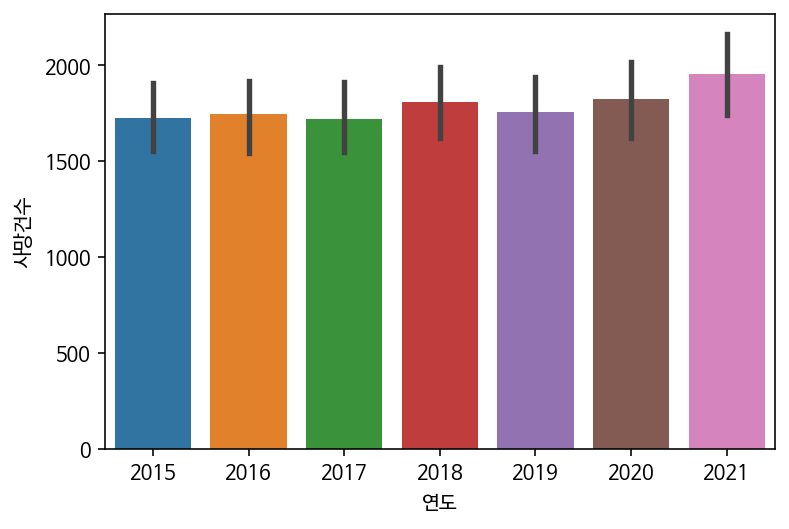

In [56]:
sns.barplot(x=df_1_melt["연도"], y=df_1_melt["사망건수"])

In [57]:
df_1_melt.sort_values("사망건수")["자치구별"].unique()

array(['중구', '종로구', '용산구', '금천구', '성동구', '광진구', '서초구', '서대문구', '마포구',
       '영등포구', '동작구', '구로구', '도봉구', '강남구', '동대문구', '강동구', '양천구', '강북구',
       '관악구', '중랑구', '성북구', '송파구', '은평구', '강서구', '노원구'], dtype=object)

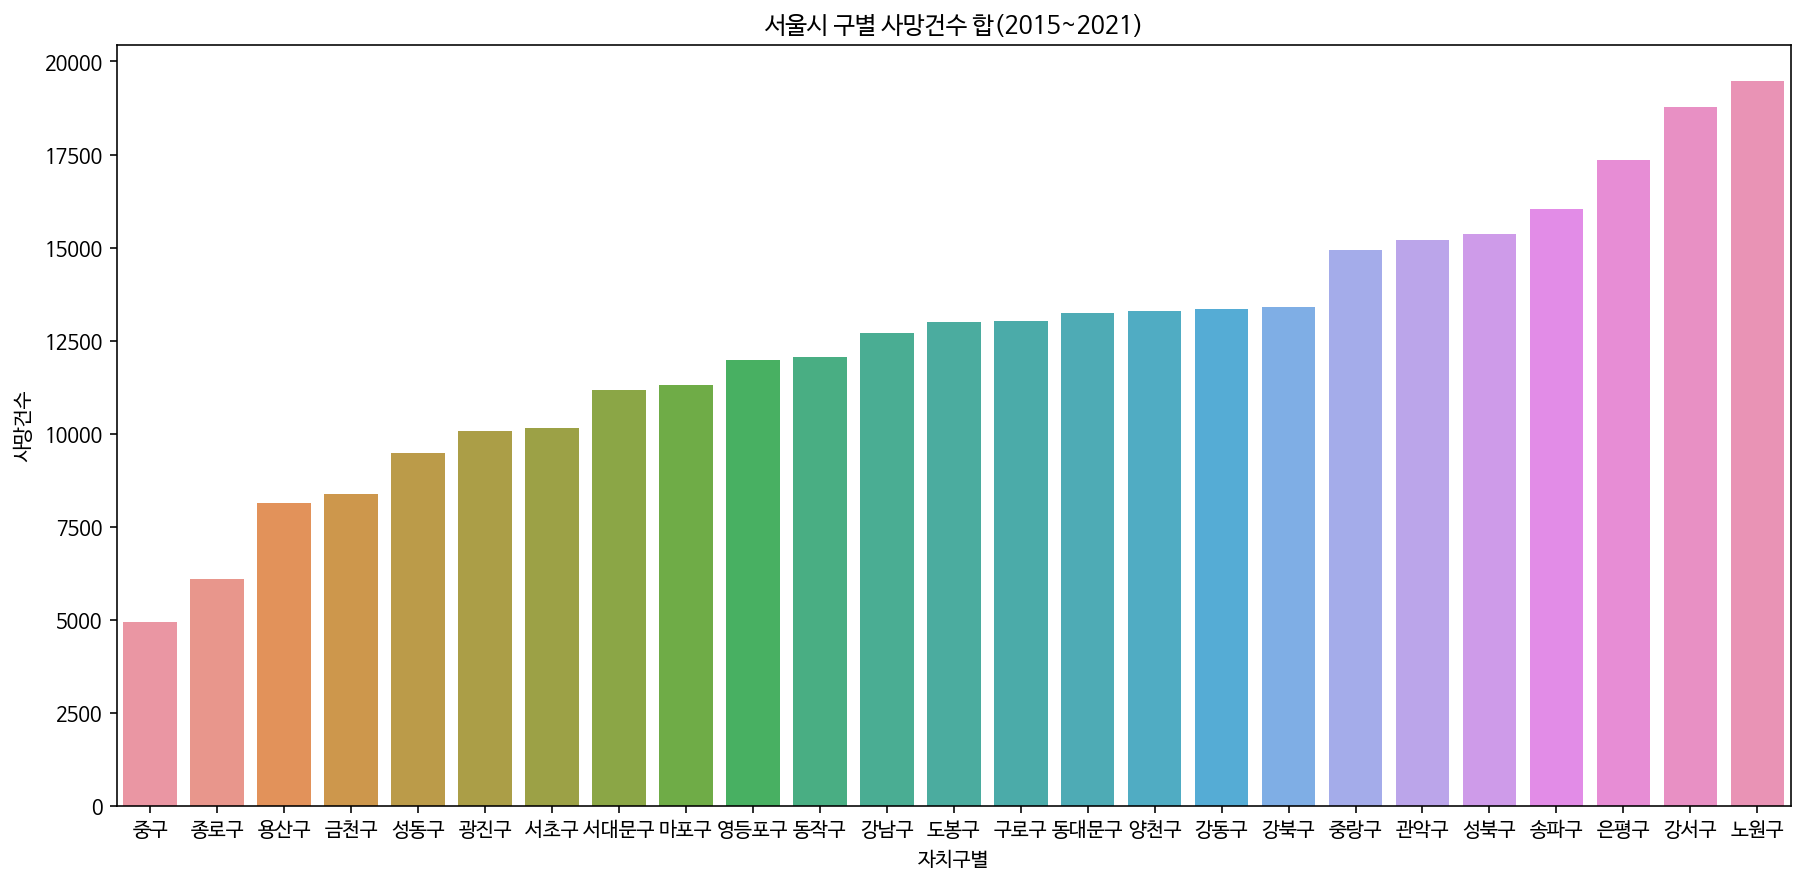

In [58]:
plt.figure(figsize=(15, 7))
df_temp = df_1_melt.drop(columns="연도").groupby("자치구별").sum().reset_index().sort_values("사망건수")
plt.title("서울시 구별 사망건수 합(2015~2021)")
sns.barplot(x=df_temp["자치구별"], 
            y=df_temp["사망건수"])

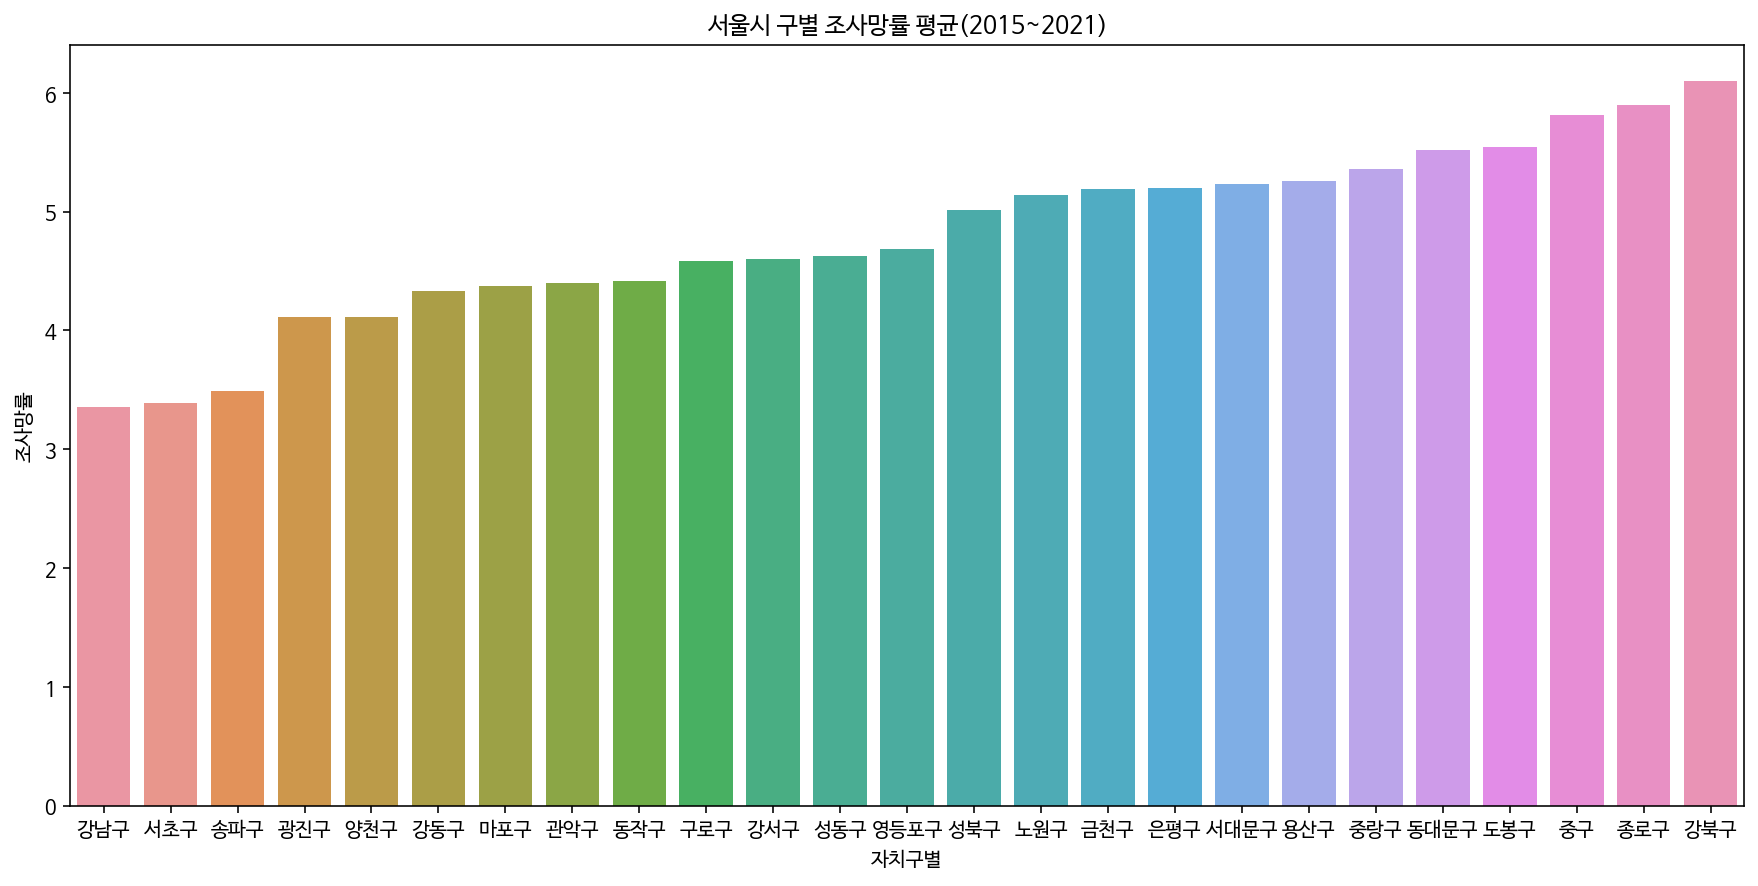

In [59]:
plt.figure(figsize=(15, 7))
df_temp = df_1_melt.drop(columns="연도").groupby("자치구별").mean().reset_index().sort_values("조사망률")
plt.title("서울시 구별 조사망률 평균(2015~2021)")
sns.barplot(x=df_temp["자치구별"], 
            y=df_temp["조사망률"])

### 과징금 데이터

In [60]:
# 과징금 데이터
df_2 = read_excel("https://github.com/mjuppp1/SDA2022/blob/main/data/%EA%B3%BC%EC%A7%95%EA%B8%88%EB%8D%B0%EC%9D%B4%ED%84%B0.xlsx?raw=true")

In [61]:
df_2.shape

(26, 8)

In [62]:
df_2.head()

0     1     2     3     4     5     6     7
0    자치구별  2015  2016  2017  2018  2019  2020  2021
1  　　　종로구  5154  4326  5827  5396  5957  5811  4915
2   　　　중구  7971  7127  6425  6964  7469  8449  7005
3  　　　용산구  2905  2738  2534  2554  3410  3640  3314
4  　　　성동구  2450  1898  2536  2189  2950  2990  2805

In [63]:
df_2.columns = df_2.iloc[0]
df_2 = df_2.iloc[1:]
df_2

0      자치구별  2015  2016  2017  2018  2019   2020   2021
1    　　　종로구  5154  4326  5827  5396  5957   5811   4915
2     　　　중구  7971  7127  6425  6964  7469   8449   7005
3    　　　용산구  2905  2738  2534  2554  3410   3640   3314
4    　　　성동구  2450  1898  2536  2189  2950   2990   2805
5    　　　광진구  1698  4539  5346  5494  4876   5319   6543
6   　　　동대문구  2864  2388  2683  2746  3411   3192   3467
7    　　　중랑구  2763  2694  3895  3965  4550   4856   4607
8    　　　성북구  2938  2218  2748  2409  2738   3169   2824
9    　　　강북구  1834  1919  2156  2152  2520   2436   2109
10   　　　도봉구  1141  1336  1526  1784  1527   1288   1466
11   　　　노원구  2046  2061  1798  1959  2236   1522   1801
12   　　　은평구  2462  1593  1738  2510  3023   3620   3608
13  　　　서대문구  3283  3488  3350  3107  3287   3097   2980
14   　　　마포구  3951  3501  4790  4139  4477   4145   4323
15   　　　양천구  1905  1827  2086  2707  3210   2599   2213
16   　　　강서구  2951  3051  3649  4052  4613   3608   4422
17   　　　구로구  2926  1986  2783  2475  3167   3037   3083
18   　　　금천구  1923  2606  2302  2137  2359   2339   2059
19  　　　영등포구  4856  4927  4739  4754  5237   4858   5126
20   　　　동작구  4146  2484  4589  5135  5606   4495   5270
21   　　　관악구  3006  3107  3712  3461  4278   5961   6379
22   　　　서초구   308  3975  7010  5553  8497   7414   6316
23   　　　강남구  6095  6611  9744  8160  8228   6929   6901
24   　　　송파구  5413  7201  7137  9069  8660  10150  10918
25   　　　강동구  4215  3602  5013  5690  6506   4871   3760

In [64]:
df_2.columns

Index(['자치구별', 2015, 2016, 2017, 2018, 2019, 2020, 2021], dtype='object', name=0)

In [65]:
#과징금 melt
df_2_melt = df_2.melt(
    id_vars='자치구별', 
    var_name="연도",
    value_name="과징금"
    )
df_2_melt.head()
# 근데 과징금 단위가 얼마지?

자치구별    연도   과징금
0  　　　종로구  2015  5154
1   　　　중구  2015  7971
2  　　　용산구  2015  2905
3  　　　성동구  2015  2450
4  　　　광진구  2015  1698

### 재정자립도 데이터

#### 재정 자립도 참고사항

1. 재정자립도 = 자체수입(지방세+세외수입) / 일반회계 예산액 *100
2. 평균은 예산순계, 자치단체별을 예산총계 기준임
3. 2010-2011 : ( )는 세입과목 개편전 기준으로 산정한 재정자립도임
4. 2014-2020 : 세입과목 개편후 기준으로 산정한 재정자립도임(2014-2016은 ( )에 해당하는 수치)

출처: https://data.seoul.go.kr/dataList/188/S/2/datasetView.do

In [66]:
df_3.head()

0       1       2       3       4       5       6       7
0  자치구별  2015.0  2016.0  2017.0  2018.0  2019.0  2020.0  2021.0
1   종로구    50.0    50.4    50.8    47.4    47.4    47.0    47.2
2    중구    58.6    57.1    58.4    53.4    54.9    53.5    55.3
3   용산구    40.1    41.0    42.4    41.1    39.2    39.3    41.7
4   성동구    34.5    37.3    34.5    34.1    32.5    32.7    33.2

In [67]:
df_3.columns = df_3.iloc[0].apply(lambda x: str(x).replace(".0",""))
df_3 = df_3.iloc[1:]
df_3

0   자치구별  2015  2016  2017  2018  2019  2020  2021
1    종로구  50.0  50.4  50.8  47.4  47.4  47.0  47.2
2     중구  58.6  57.1  58.4  53.4  54.9  53.5  55.3
3    용산구  40.1  41.0  42.4  41.1  39.2  39.3  41.7
4    성동구  34.5  37.3  34.5  34.1  32.5  32.7  33.2
5    광진구  27.4  27.2  28.1  27.1  26.7  26.2  26.1
6   동대문구  27.0  27.8  27.2  25.6  23.8  23.2  24.5
7    중랑구  23.2  21.0  20.6  19.0  18.1  17.5  18.2
8    성북구  22.4  22.8  21.8  19.6  19.6  20.0  20.6
9    강북구  18.6  19.1  18.8  17.6  16.8  16.8  17.2
10   도봉구  19.5  20.4  19.8  18.5  17.8  18.4  18.9
11   노원구  15.9  17.7  17.8  15.6  15.4  15.8  15.9
12   은평구  19.8  20.8  19.1  18.0  17.5  17.9  18.4
13  서대문구  25.7  26.2  26.6  25.4  24.1  23.4  23.5
14   마포구  33.3  33.1  32.9  31.5  30.7  31.6  32.0
15   양천구  27.3  28.2  28.5  26.8  24.5  25.2  25.2
16   강서구  22.4  22.5  21.6  21.5  19.7  21.1  21.9
17   구로구  25.1  24.8  24.0  22.5  21.8  22.2  22.5
18   금천구  27.4  26.8  27.2  25.6  25.3  24.7  26.3
19  영등포구  44.2  42.8  42.0  37.9  35.7  36.0  36.5
20   동작구  28.7  28.7  27.2  26.8  26.0  26.4  29.1
21   관악구  21.6  20.7  20.6  19.4  18.7  19.3  19.7
22   서초구  57.4  57.9  52.5  53.4  53.3  54.7  58.2
23   강남구  60.0  60.0  58.2  53.3  54.4  52.3  54.9
24   송파구  42.1  42.9  42.8  39.0  38.4  37.6  39.8
25   강동구  29.2  30.2  30.1  31.0  22.2  26.3  26.7

In [68]:
df_3_melt = df_3.melt(id_vars="자치구별", 
          value_vars=df_3.columns[1:],
          var_name="연도",
          value_name="재정자립도")
df_3_melt.head()

자치구별    연도  재정자립도
0  종로구  2015   50.0
1   중구  2015   58.6
2  용산구  2015   40.1
3  성동구  2015   34.5
4  광진구  2015   27.4

### 재정 자주도 데이터

In [69]:
df_4.head()

0       1       2       3       4       5       6       7       8  \
0  자치구별  2014.0  2015.0  2016.0  2017.0  2018.0  2019.0  2020.0  2021.0   
1   종로구    69.9    64.9    66.9    67.8    65.4    63.6    62.2    61.8   
2    중구    67.9    62.9    62.5    63.9    61.2    61.1    59.5    59.9   
3   용산구    58.1    54.9    57.6    60.0    59.3    55.5    54.6    57.9   
4   성동구    52.2    55.2    58.4    57.4    57.5    54.8    53.5    53.0   

        9  
0  2022.0  
1    64.9  
2    61.0  
3    58.7  
4    55.7

In [70]:
df_4.columns = df_4.iloc[0].apply(lambda x: str(x).replace(".0",""))
df_4 = df_4.iloc[1:]
df_4.head()

0 자치구별  2014  2015  2016  2017  2018  2019  2020  2021  2022
1  종로구  69.9  64.9  66.9  67.8  65.4  63.6  62.2  61.8  64.9
2   중구  67.9  62.9  62.5  63.9  61.2  61.1  59.5  59.9  61.0
3  용산구  58.1  54.9  57.6  60.0  59.3  55.5  54.6  57.9  58.7
4  성동구  52.2  55.2  58.4  57.4  57.5  54.8  53.5  53.0  55.7
5  광진구  59.3  55.8  55.3  56.5  53.9  52.0  50.8  49.6  48.7

In [71]:
df_4_melt = df_4.melt(id_vars="자치구별", 
          value_vars=df_3.columns[1:],
          var_name="연도",
          value_name="재정자주도")
df_4_melt.head()

자치구별    연도  재정자주도
0  종로구  2015   64.9
1   중구  2015   62.9
2  용산구  2015   54.9
3  성동구  2015   55.2
4  광진구  2015   55.8

In [72]:
df_data = pd.concat([
    df_1_melt.sort_values(["연도", "자치구별"]),
    df_2_melt.sort_values(["연도", "자치구별"])["과징금"],
    df_3_melt.sort_values(["연도", "자치구별"])["재정자립도"],
    df_4_melt.sort_values(["연도", "자치구별"])["재정자주도"]
], axis=1)
df_data.head()

연도 자치구별  사망건수  조사망률   과징금  재정자립도  재정자주도
0  2015  종로구   829   5.5  5154   50.0   64.9
1  2016  종로구   823   5.5  7971   58.6   62.9
2  2017  종로구   826   5.6  2905   40.1   54.9
3  2018  종로구   897   6.0  2450   34.5   55.2
4  2019  종로구   854   5.8  1698   27.4   55.8

- `df_data`가 최종 전처리된 데이터프레임입니다. 

## EDA (df_data로)

In [73]:
#MinMaxScaler로 정규화하는 함수 정의
def mm(df):
  from sklearn.preprocessing import MinMaxScaler
  mm = MinMaxScaler()
  output = mm.fit_transform(df)
  return pd.DataFrame(output, columns=df.columns, index=list(df.index.values))

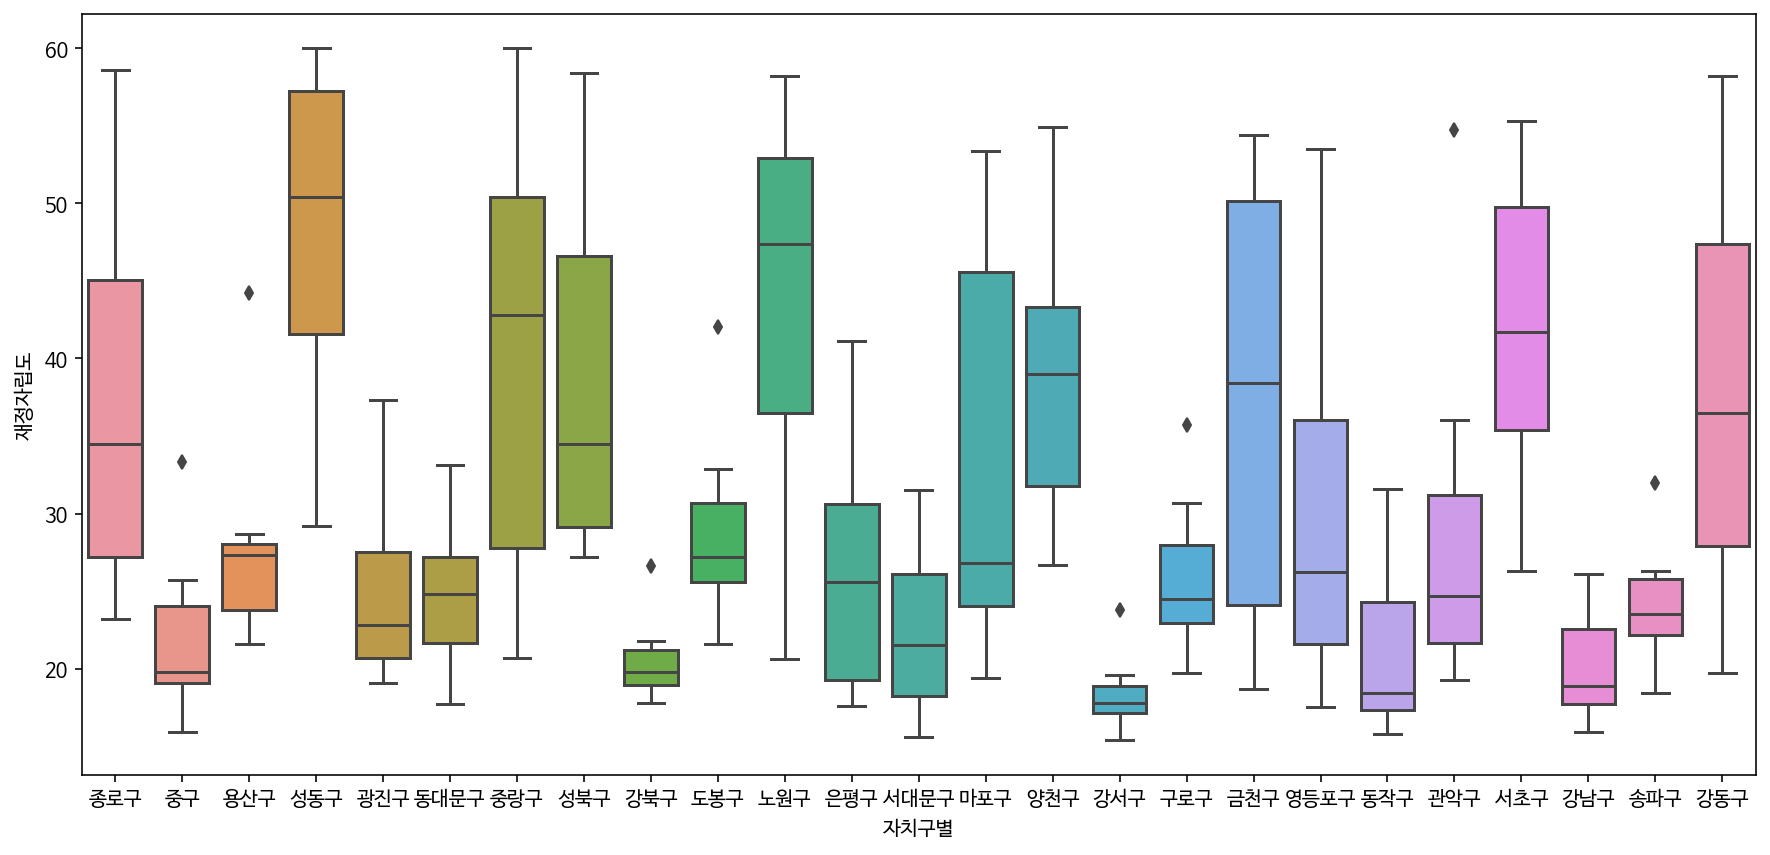

In [74]:
#(2015~2021)자치구별 재정자립도 보기
plt.figure(figsize=(15, 7))
sns.boxplot(x="자치구별", y="재정자립도", data=df_data)

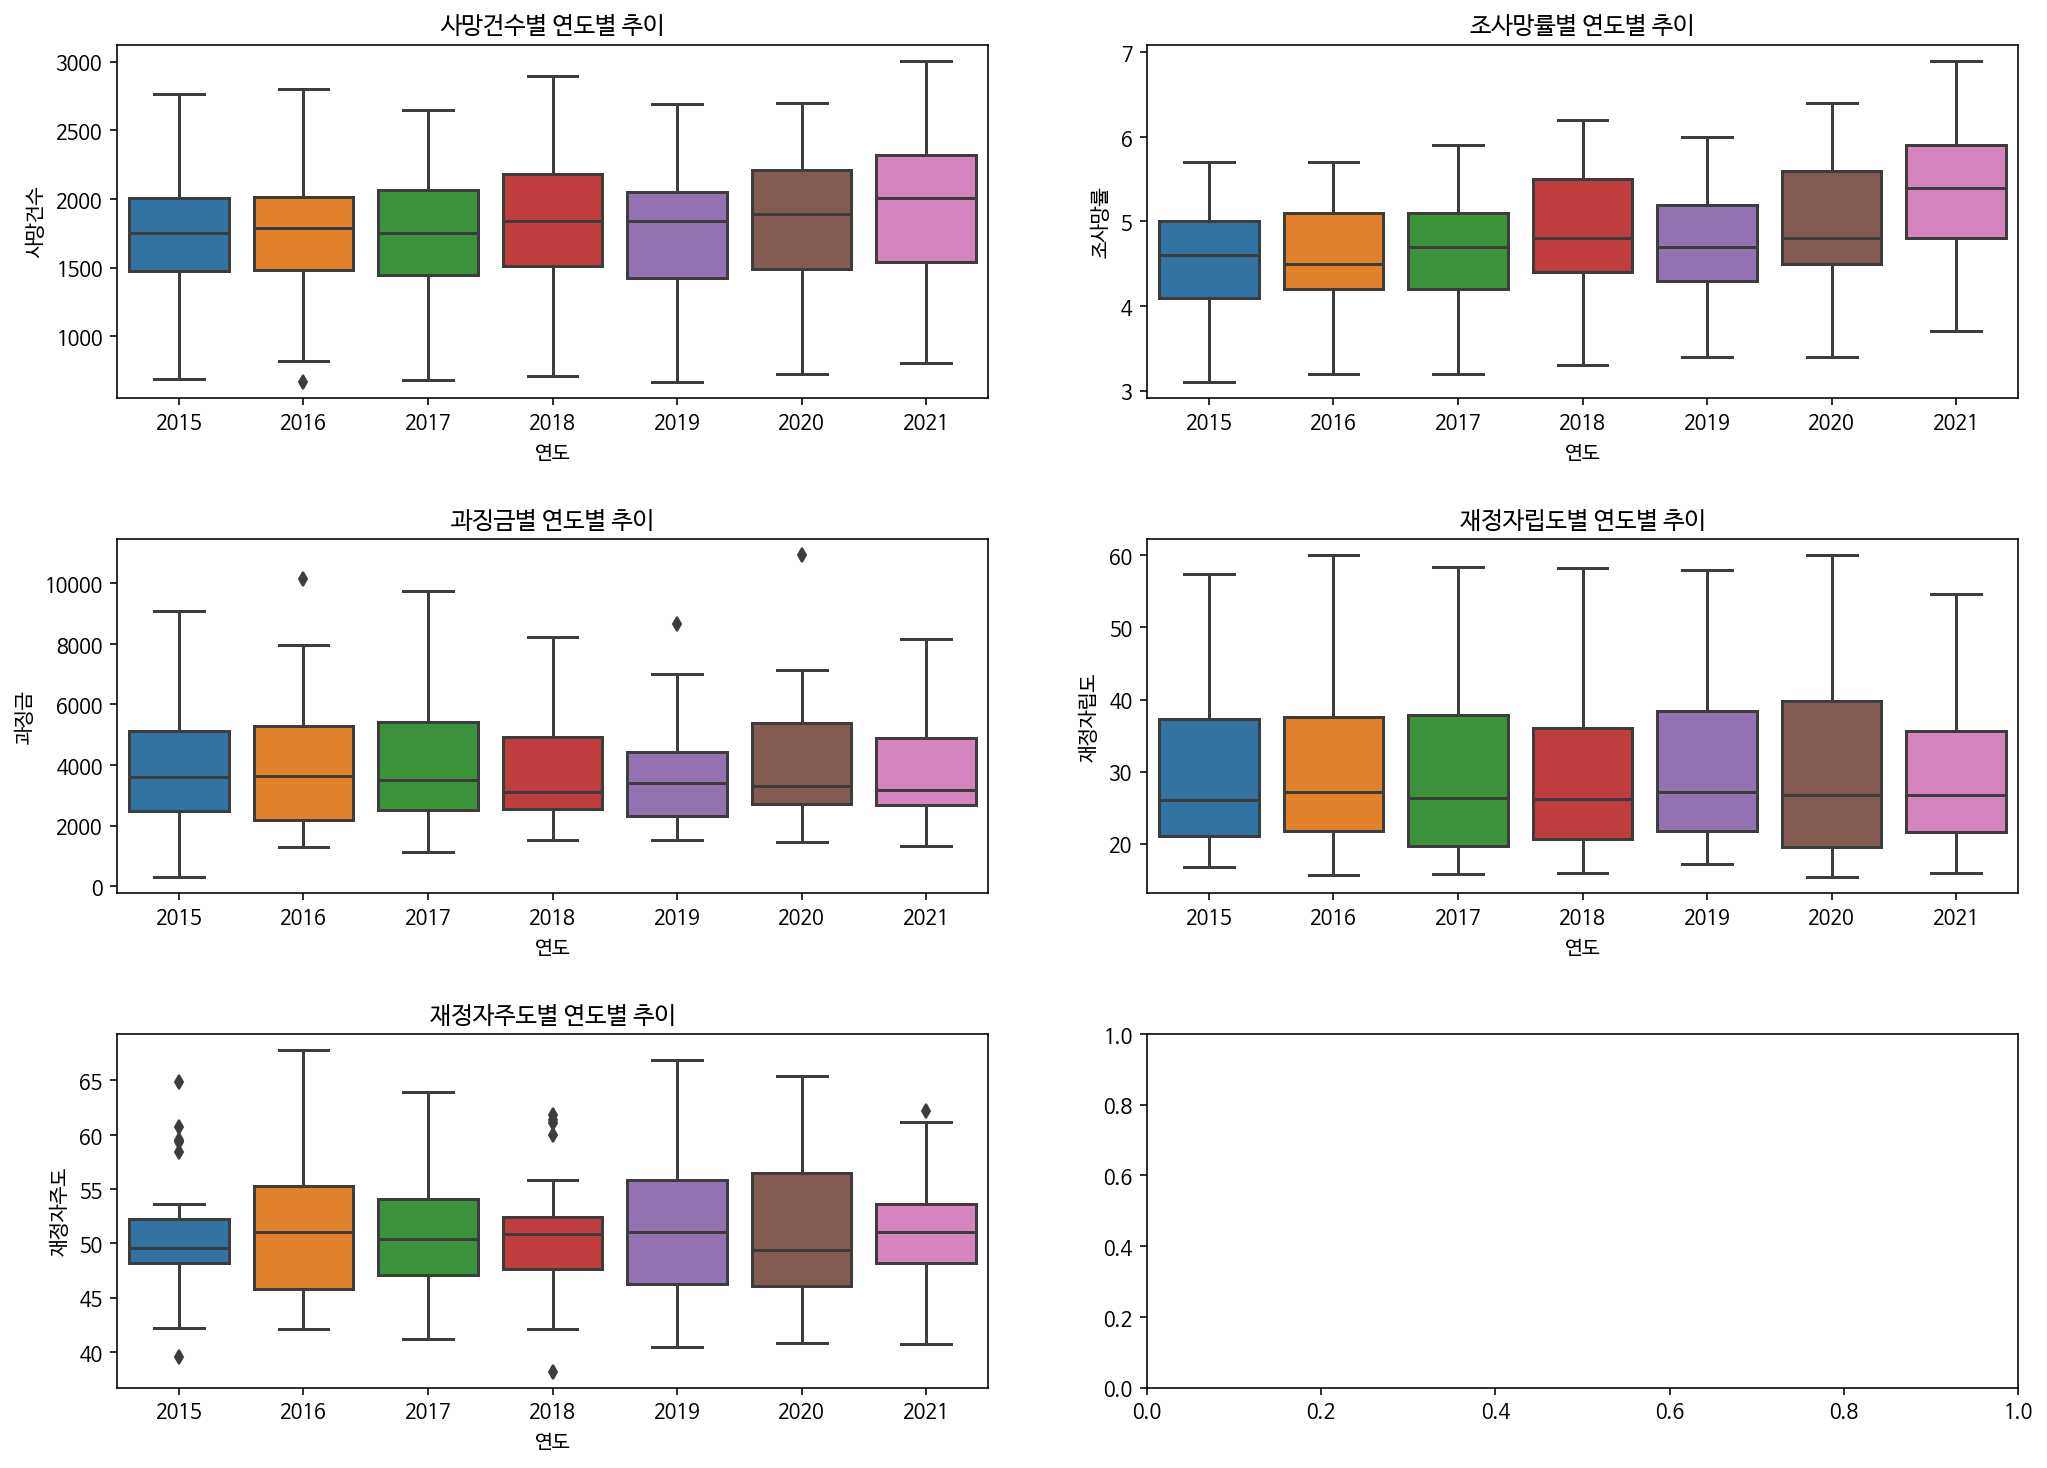

In [75]:
# 연도별 각 variable boxplot 보기
fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(15, 11))
plt.tight_layout(pad=5.0)

for i, title in enumerate(df_data.columns[2:]):
  df_temp = df_data.pivot('자치구별', '연도', title)
  sns.boxplot(x="연도",y=title, data=df_data, ax=ax[i//2, i%2])
  ax[i//2, i%2].set_title(f'{title}별 연도별 추이')

In [76]:
#log scale로 변환
df_data_log = df_data[:]
df_data_log[df_data_log.columns[2:]] = np.log(df_data[df_data.columns[2:]])
df_data_log

연도 자치구별      사망건수      조사망률       과징금     재정자립도     재정자주도
0    2015  종로구  6.720220  1.704748  8.547528  3.912023  4.172848
1    2016  종로구  6.712956  1.704748  8.983565  4.070735  4.141546
2    2017  종로구  6.716595  1.722767  7.974189  3.691376  4.005513
3    2018  종로구  6.799056  1.791759  7.803843  3.540959  4.010963
4    2019  종로구  6.749931  1.757858  7.437206  3.310543  4.021774
..    ...  ...       ...       ...       ...       ...       ...
170  2017  강동구  7.537430  1.458615  8.760767  2.980619  3.819908
171  2018  강동구  7.552237  1.504077  8.750841  4.063885  4.117410
172  2019  강동구  7.548556  1.504077  8.839422  4.005513  4.025352
173  2020  강동구  7.550135  1.458615  9.298168  3.683867  3.830813
174  2021  강동구  7.660114  1.547563  8.232174  3.284664  3.860730

[175 rows x 7 columns]

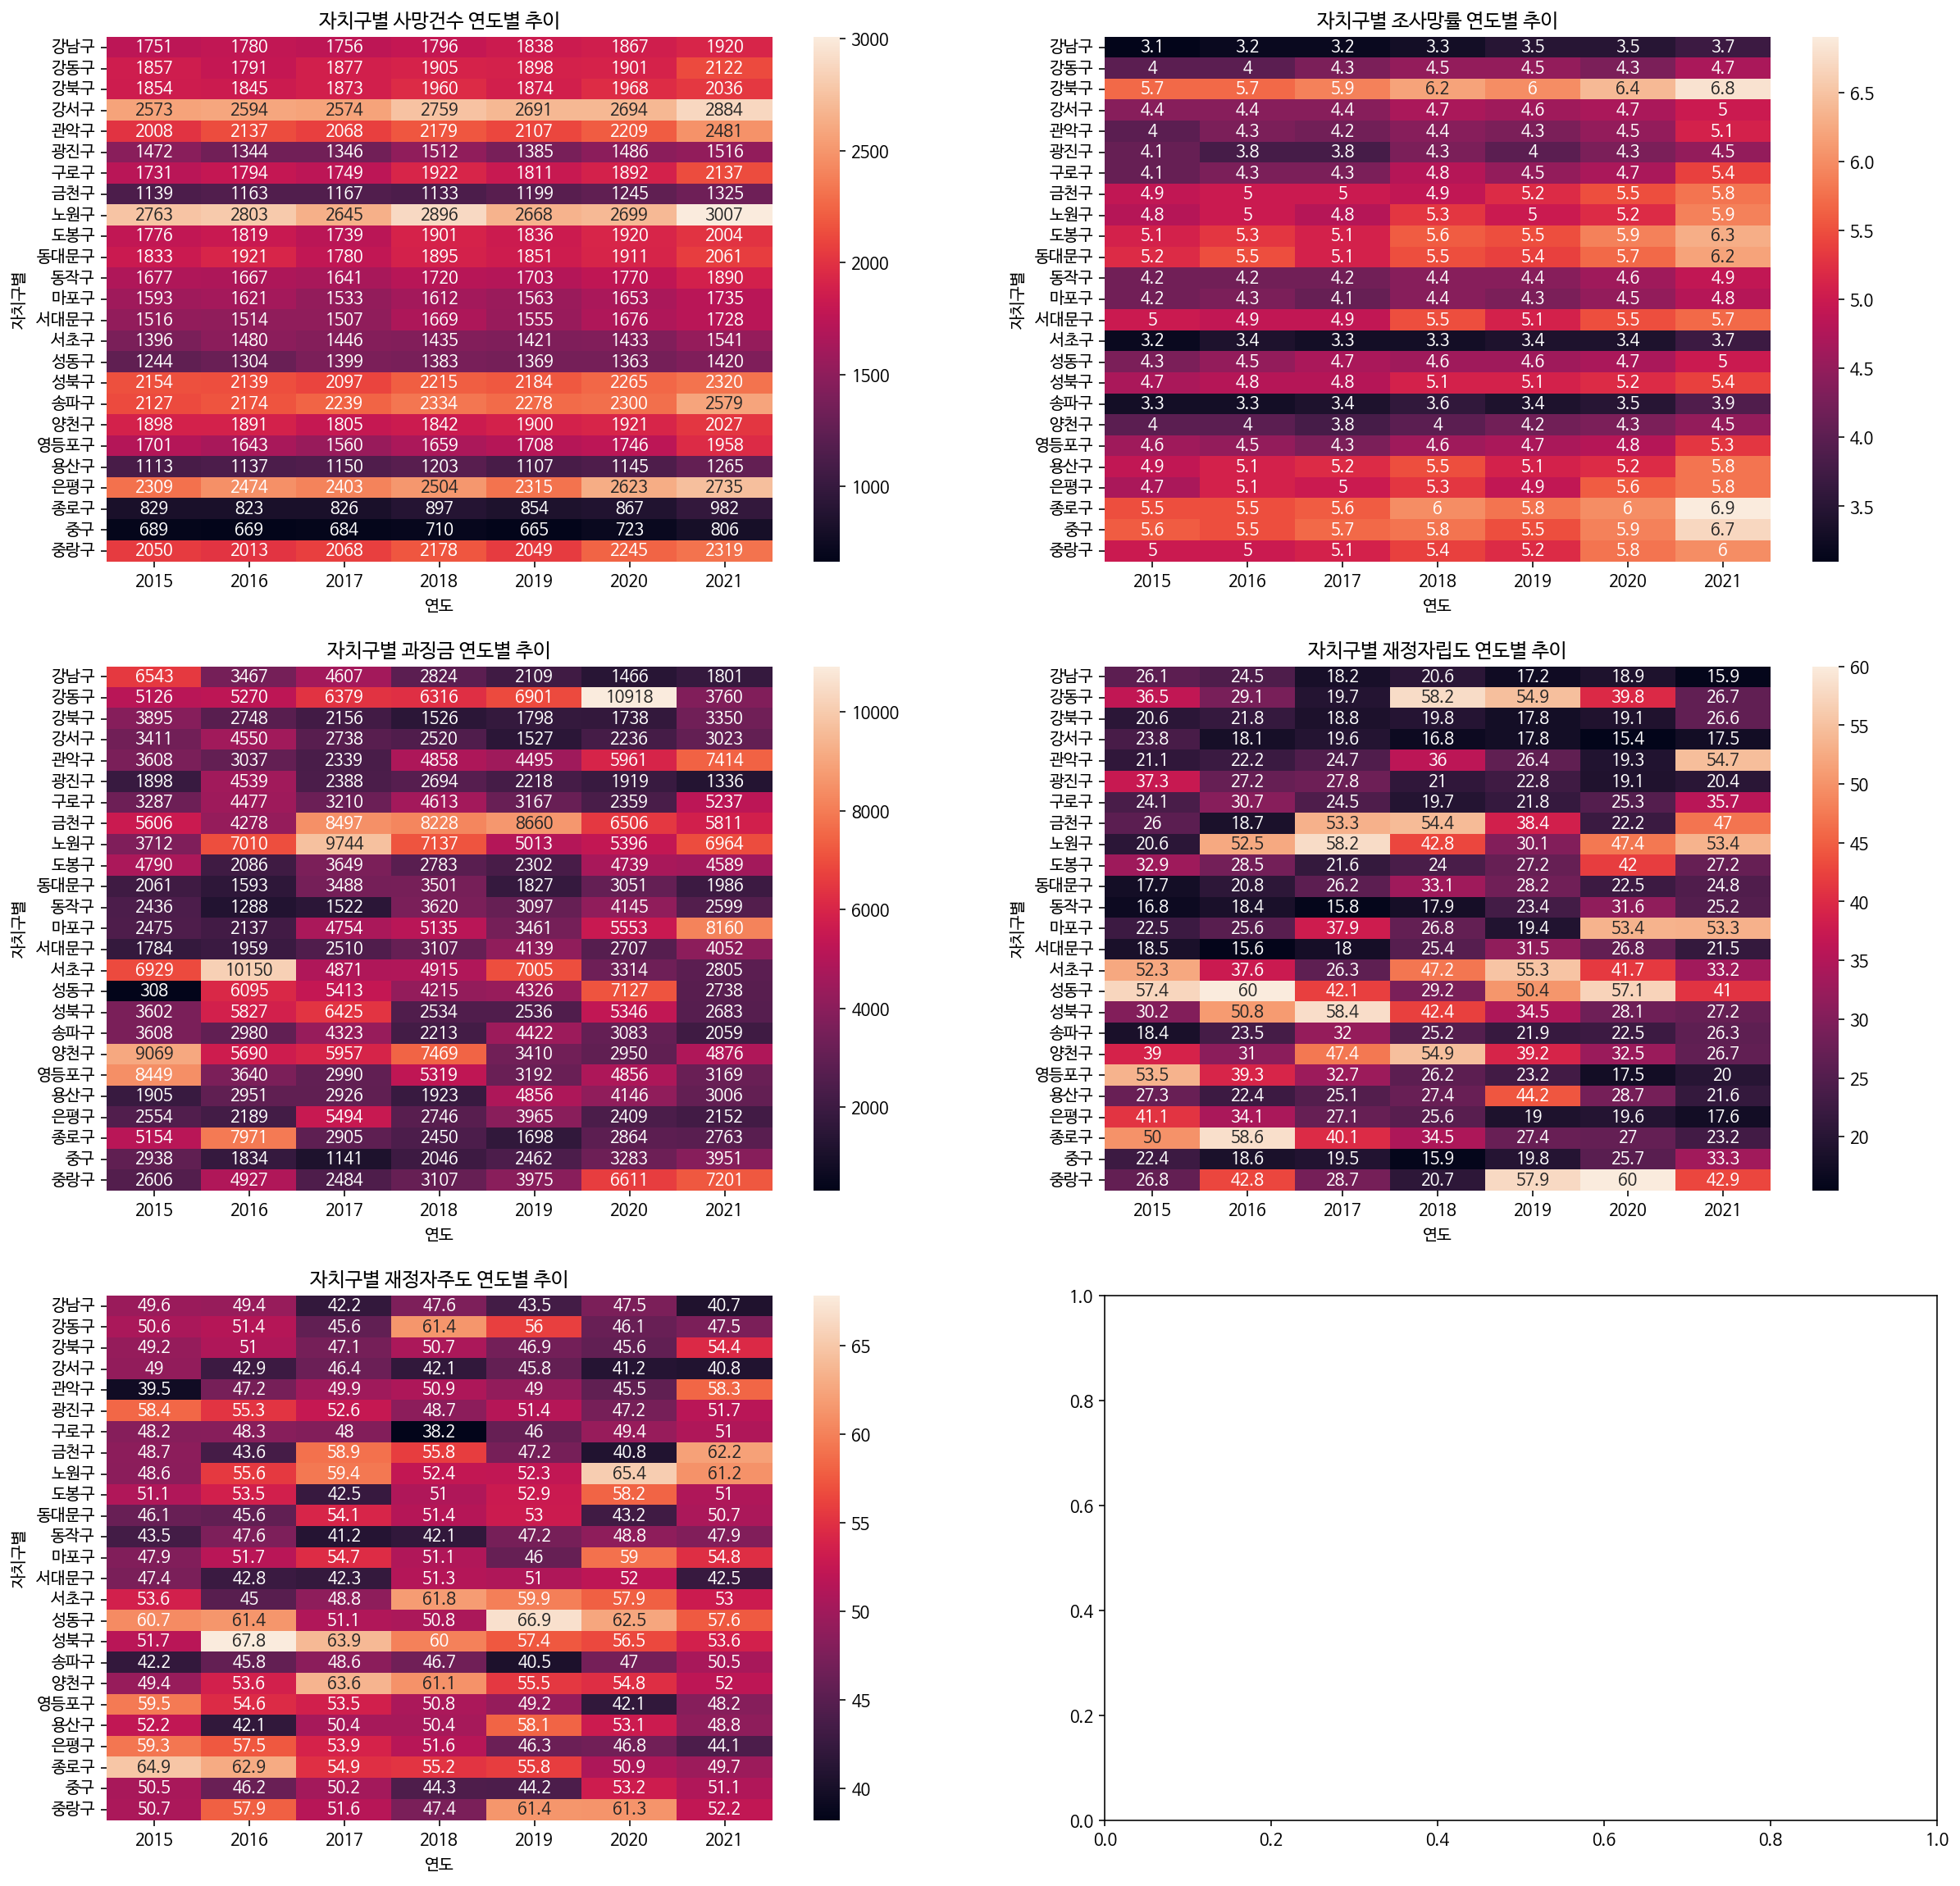

In [77]:
# 연도별 각 항목별 추이 보기
# plt.figure(figsize=(7, 8))
fig, ax = plt.subplots(3, 2, figsize=(20, 20))
for i, title in enumerate(df_data.columns[2:]):
  df_temp = df_data.pivot('자치구별', '연도', title)
  sns.heatmap(df_temp, annot=True, fmt='g', ax=ax[i//2, i%2])
  ax[i//2, i%2].set_title(f'자치구별 {title} 연도별 추이')

In [78]:
#자치구별 각 지표 평균 알아보기
df_data.groupby("자치구별").mean()

사망건수      조사망률          과징금      재정자립도      재정자주도
자치구별                                                          
강남구   1815.428571  3.357143  3259.571429  20.200000  45.785714
강동구   1907.285714  4.328571  6381.428571  37.842857  51.228571
강북구   1915.714286  6.100000  2458.714286  20.642857  49.271429
강서구   2681.285714  4.600000  2857.857143  18.428571  44.028571
관악구   2169.857143  4.400000  4530.285714  29.200000  48.614286
광진구   1437.285714  4.114286  2427.428571  25.085714  52.185714
구로구   1862.285714  4.585714  3764.285714  25.971429  47.014286
금천구   1195.857143  5.185714  6798.000000  37.142857  51.028571
노원구   2783.000000  5.142857  6425.142857  43.571429  56.414286
도봉구   1856.428571  5.542857  3562.571429  29.057143  51.457143
동대문구  1893.142857  5.514286  2501.000000  24.757143  49.157143
동작구   1724.000000  4.414286  2672.428571  21.300000  45.471429
마포구   1615.714286  4.371429  4525.000000  34.128571  52.171429
서대문구  1595.000000  5.228571  2894.000000  22.471429  47.042857
서초구   1450.285714  3.385714  5712.714286  41.942857  54.285714
성동구   1354.571429  4.628571  4317.428571  48.171429  58.714286
성북구   2196.285714  5.014286  4136.142857  38.800000  58.700000
송파구   2290.142857  3.485714  3241.142857  24.257143  45.900000
양천구   1897.714286  4.114286  5631.571429  38.671429  55.714286
영등포구  1710.714286  4.685714  4516.428571  30.342857  51.128571
용산구   1160.000000  5.257143  3101.857143  28.100000  50.728571
은평구   2480.428571  5.200000  3072.714286  26.300000  51.357143
종로구    868.285714  5.900000  3686.428571  37.257143  56.328571
중구     706.571429  5.814286  2522.142857  22.171429  48.528571
중랑구   2131.714286  5.357143  4415.857143  39.971429  54.642857

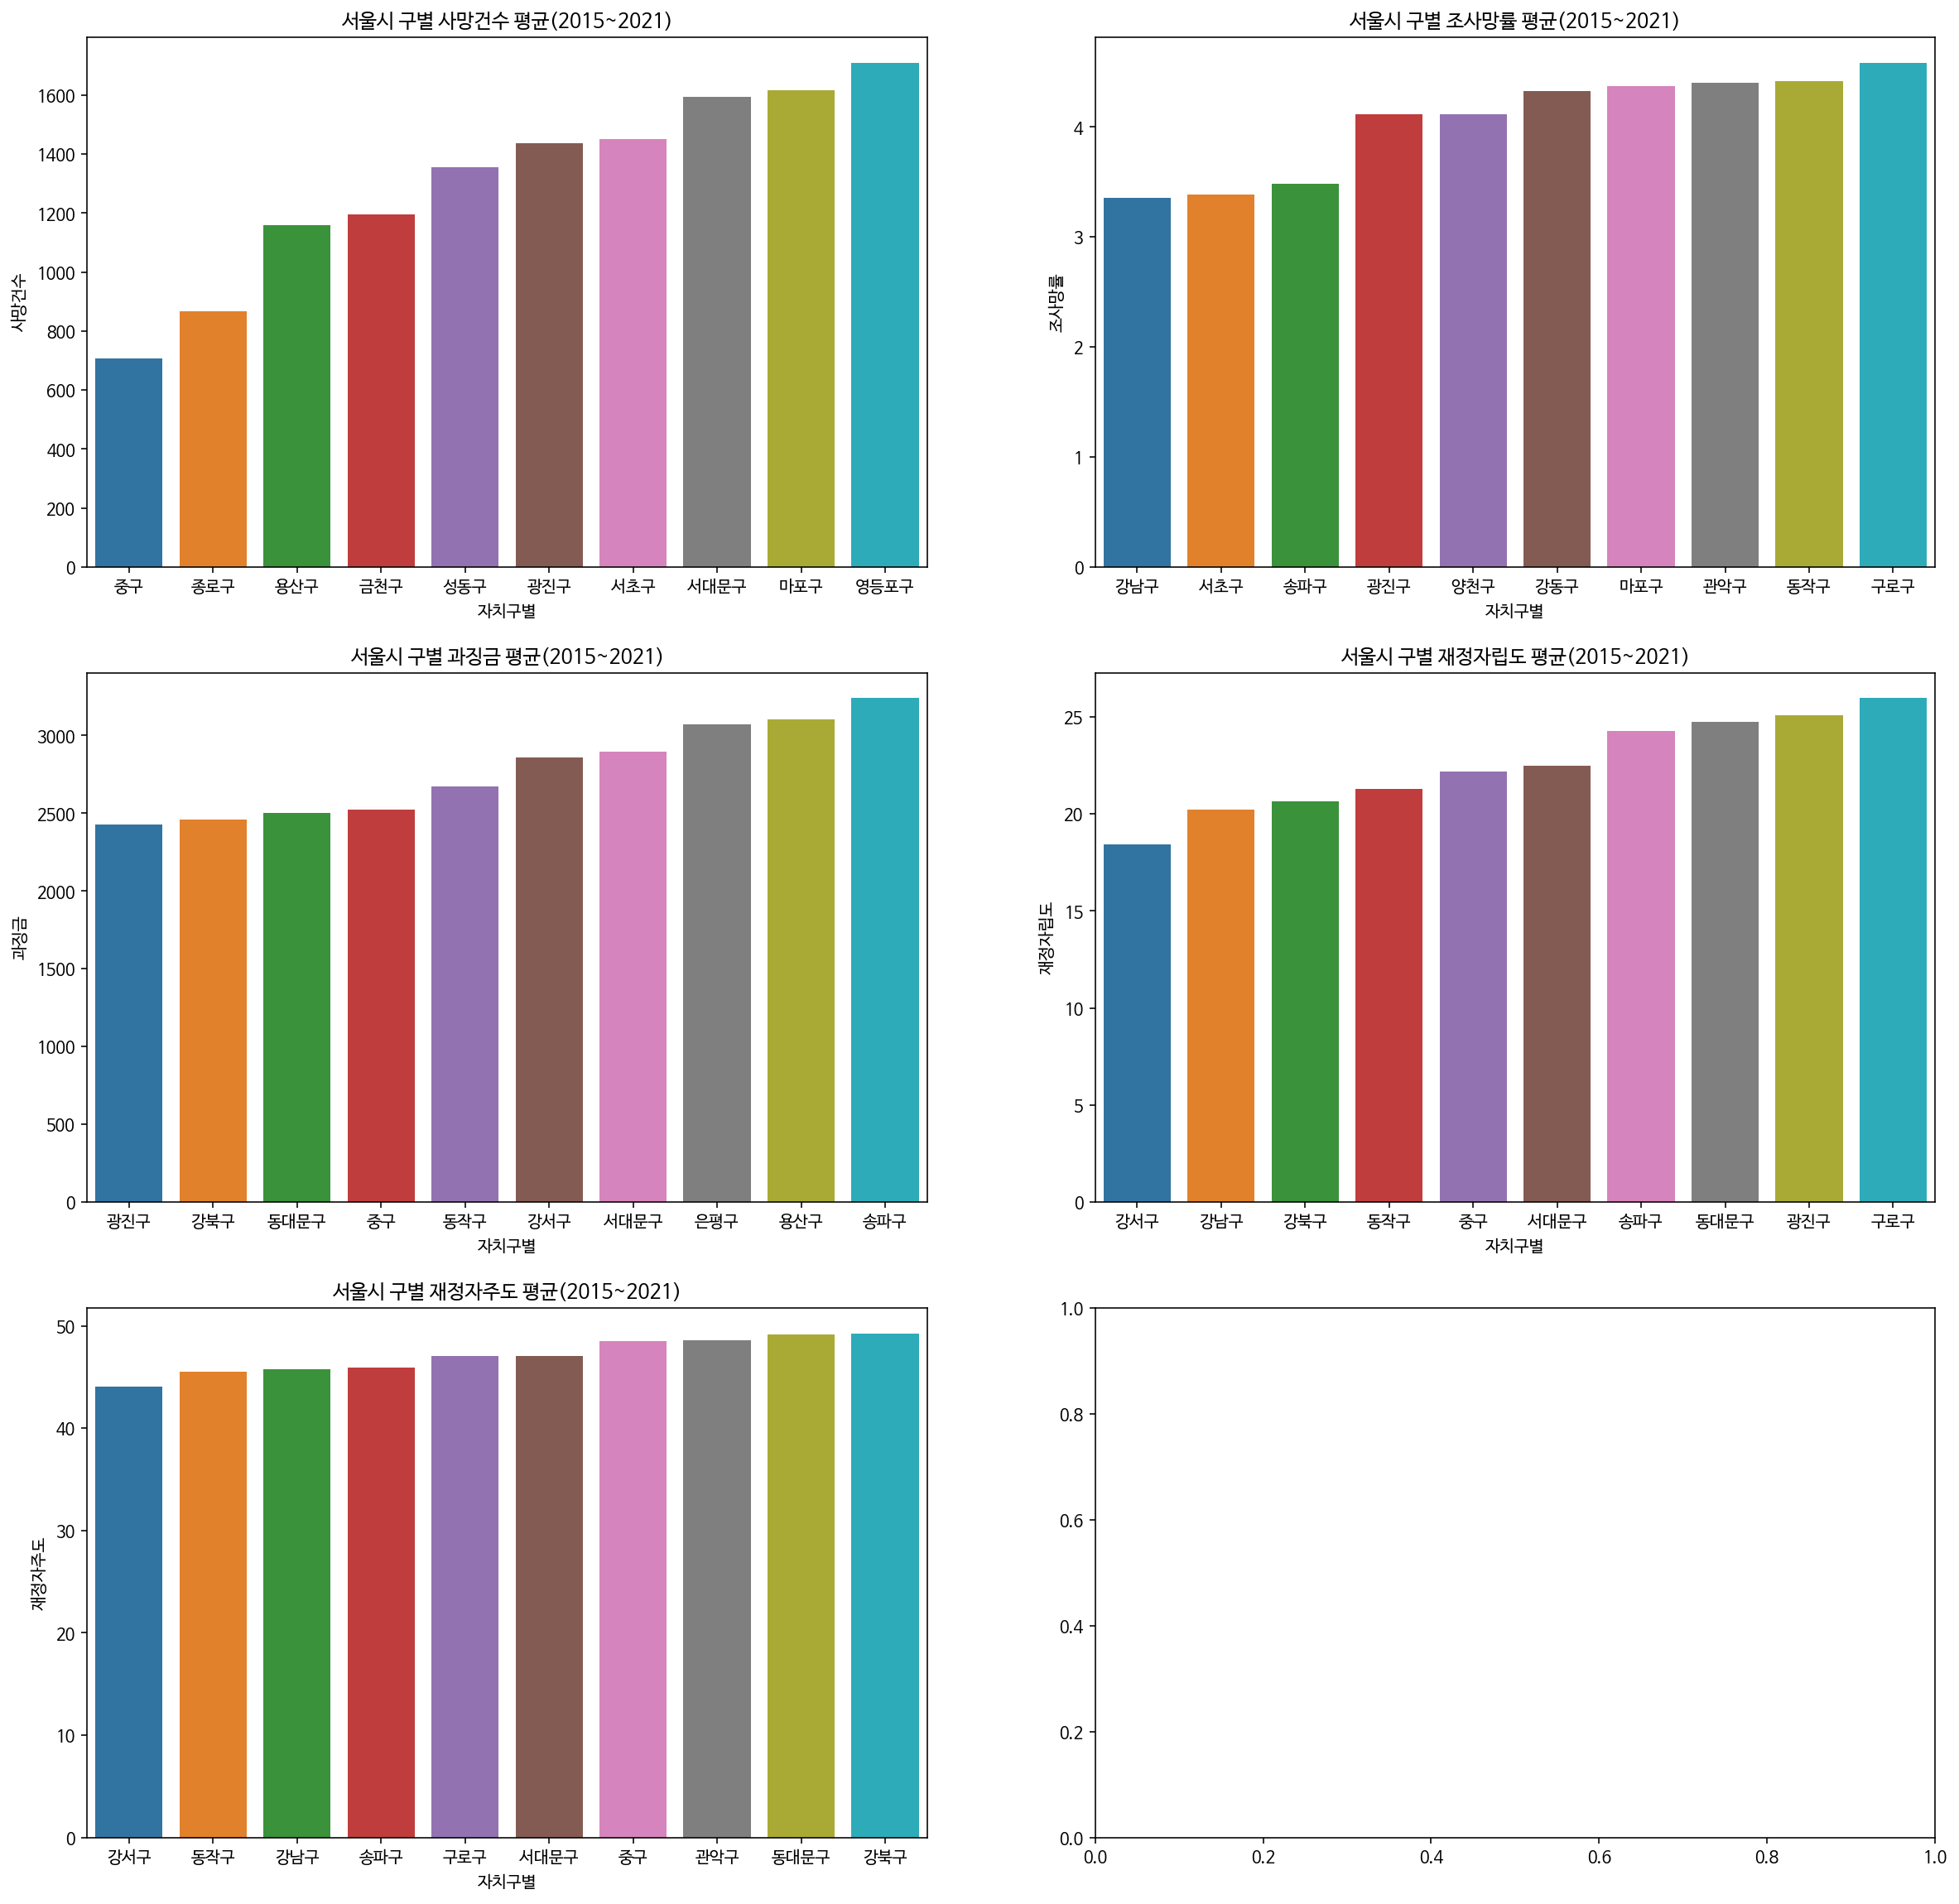

In [79]:
fig, ax = plt.subplots(3, 2, figsize=(20, 20))
for i, title in enumerate(df_data.columns[2:]):
  df_temp = df_data.groupby("자치구별").mean().reset_index().sort_values(title).head(10)
  sns.barplot(x=df_temp["자치구별"], y=df_temp[title], ax=ax[i//2, i%2])
  ax[i//2, i%2].set_title(f"서울시 구별 {title} 평균(2015~2021)")

Text(0.5, 1.0, '연도별 지표 평균 추이(MinMaxScaled)')

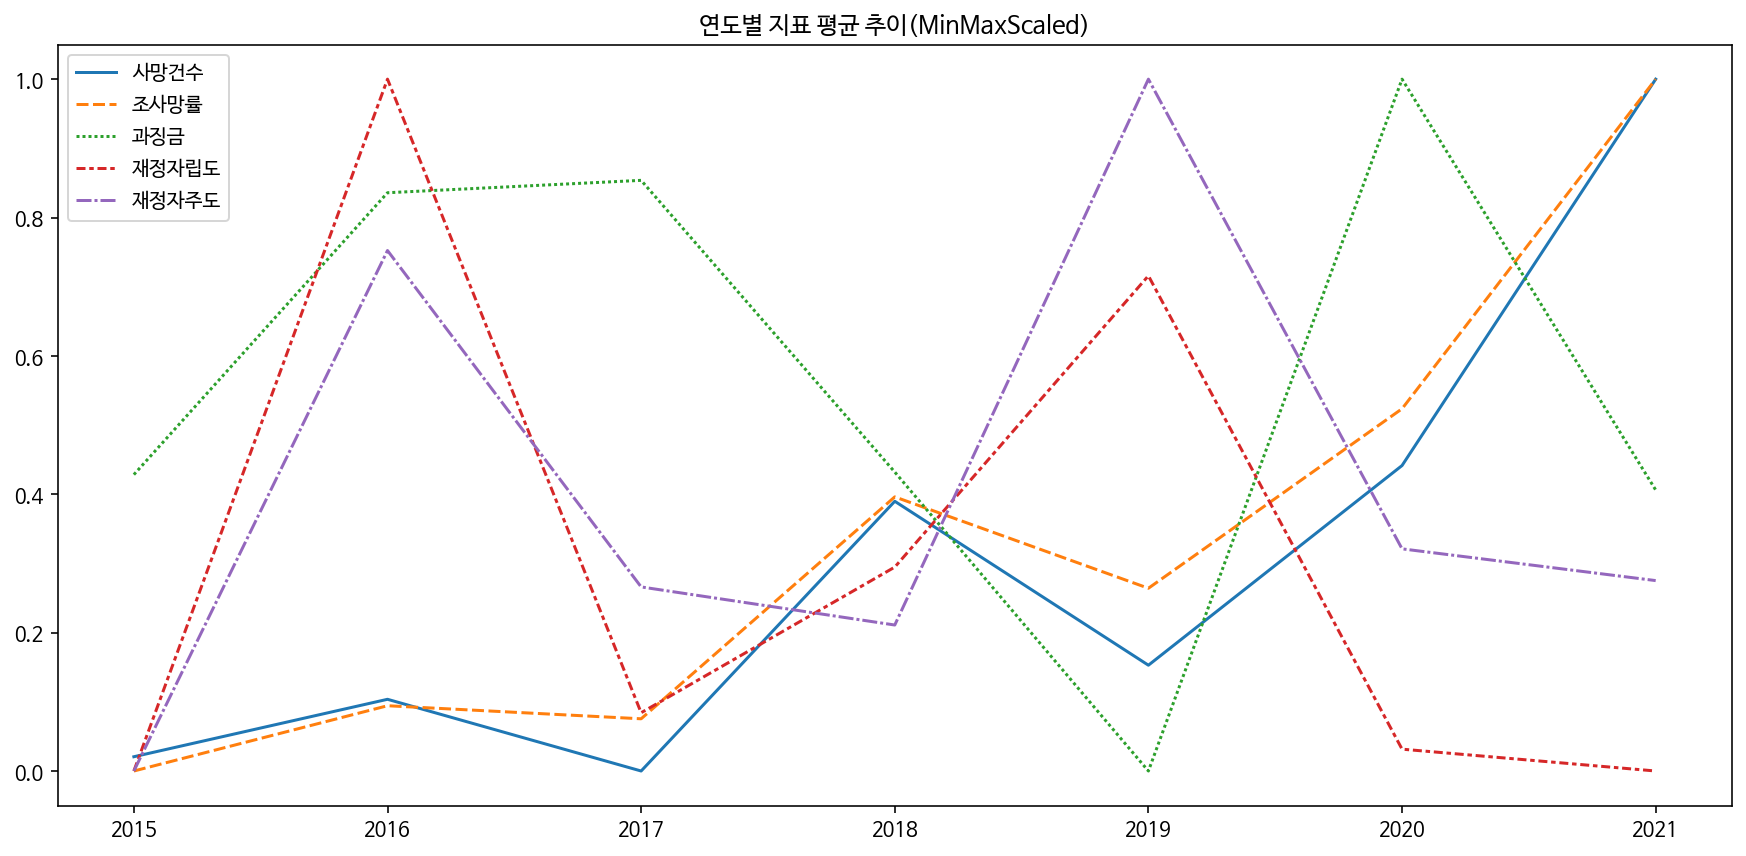

In [80]:
# 지표 변화 살펴보기
plt.figure(figsize=(15, 7))
sns.lineplot(data=mm(df_data.groupby('연도').mean()))
plt.title('연도별 지표 평균 추이(MinMaxScaled)')

Text(0.5, 1.0, '연도별 조사망률 총합 추이')

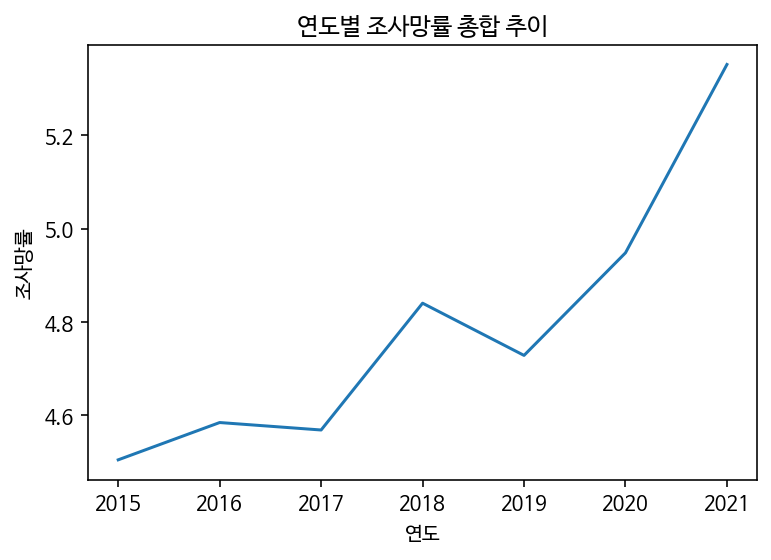

In [81]:
sns.lineplot(data=df_data.groupby('연도').mean()['조사망률'])
plt.title('연도별 조사망률 총합 추이')

Text(0.5, 1.0, '연도별 조사망률 총합 추이')

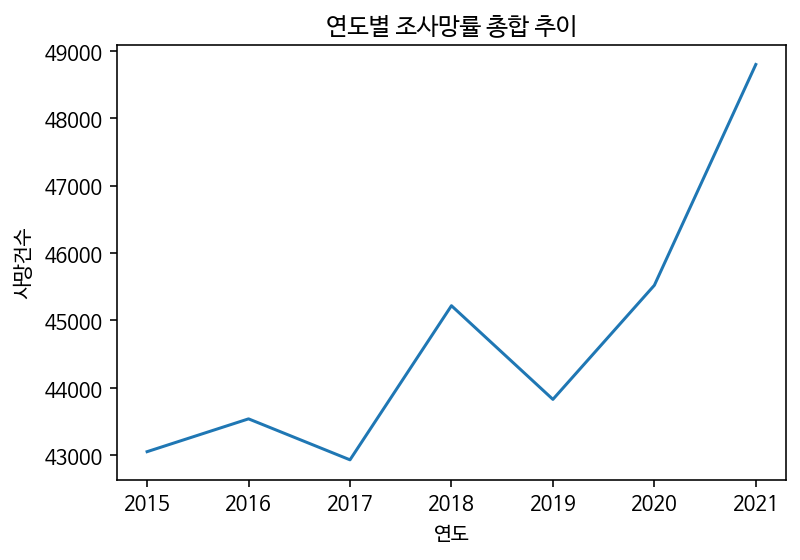

In [82]:
# 사망건수 총합
sns.lineplot(data=df_data.groupby('연도').sum()['사망건수'])
plt.title('연도별 조사망률 총합 추이')

In [83]:
# 연도별 사망건수 가장 높은 구는?
df_data.groupby("연도").max()
#-> 모두 중랑구

자치구별  사망건수  조사망률    과징금  재정자립도  재정자주도
연도                                        
2015  중랑구  2763   5.7   9069   57.4   64.9
2016  중랑구  2803   5.7  10150   60.0   67.8
2017  중랑구  2645   5.9   9744   58.4   63.9
2018  중랑구  2896   6.2   8228   58.2   61.8
2019  중랑구  2691   6.0   8660   57.9   66.9
2020  중랑구  2699   6.4  10918   60.0   65.4
2021  중랑구  3007   6.9   8160   54.7   62.2

Text(0.5, 1.0, '연도별 조사망률 총합 추이')

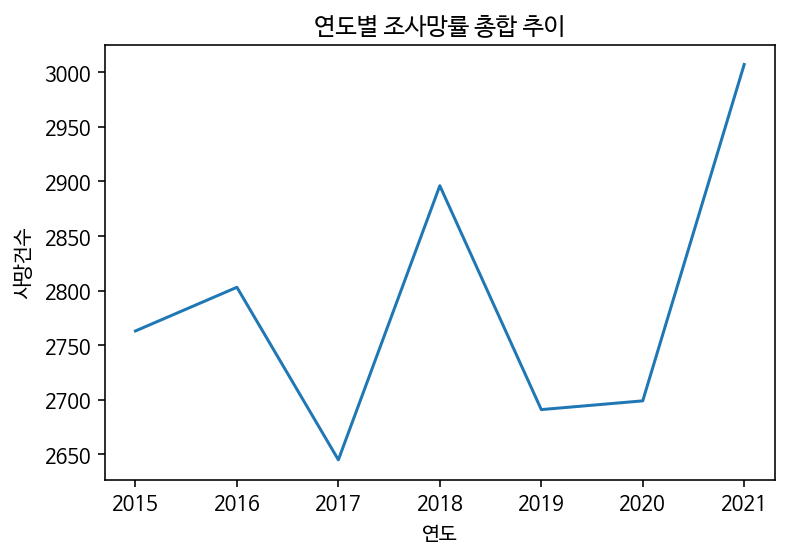

In [84]:
# 사망건수 max
df_temp = df_data.groupby('연도').max()
sns.lineplot(data=df_temp['사망건수'])
plt.title('연도별 조사망률 총합 추이')

In [85]:
df_data.groupby("자치구별").mean().reset_index().sort_values(title).head(10)['자치구별']

3      강서구
11     동작구
0      강남구
17     송파구
6      구로구
13    서대문구
23      중구
4      관악구
10    동대문구
2      강북구
Name: 자치구별, dtype: object

In [86]:
df_data.groupby(["연도", "자치구별"]).mean().reset_index().sort_values(title).head(10)

연도  자치구별    사망건수  조사망률     과징금  재정자립도  재정자주도
81   2018   구로구  1922.0   4.8  4613.0   19.7   38.2
4    2015   관악구  2008.0   4.0  3608.0   21.1   39.5
117  2019   송파구  2278.0   3.4  4422.0   21.9   40.5
150  2021   강남구  1920.0   3.7  1801.0   15.9   40.7
153  2021   강서구  2884.0   5.0  3023.0   17.5   40.8
132  2020   금천구  1245.0   5.5  6506.0   22.2   40.8
61   2017   동작구  1641.0   4.2  1522.0   15.8   41.2
128  2020   강서구  2694.0   4.7  2236.0   15.4   41.2
144  2020  영등포구  1746.0   4.8  4856.0   17.5   42.1
86   2018   동작구  1720.0   4.4  3620.0   17.9   42.1

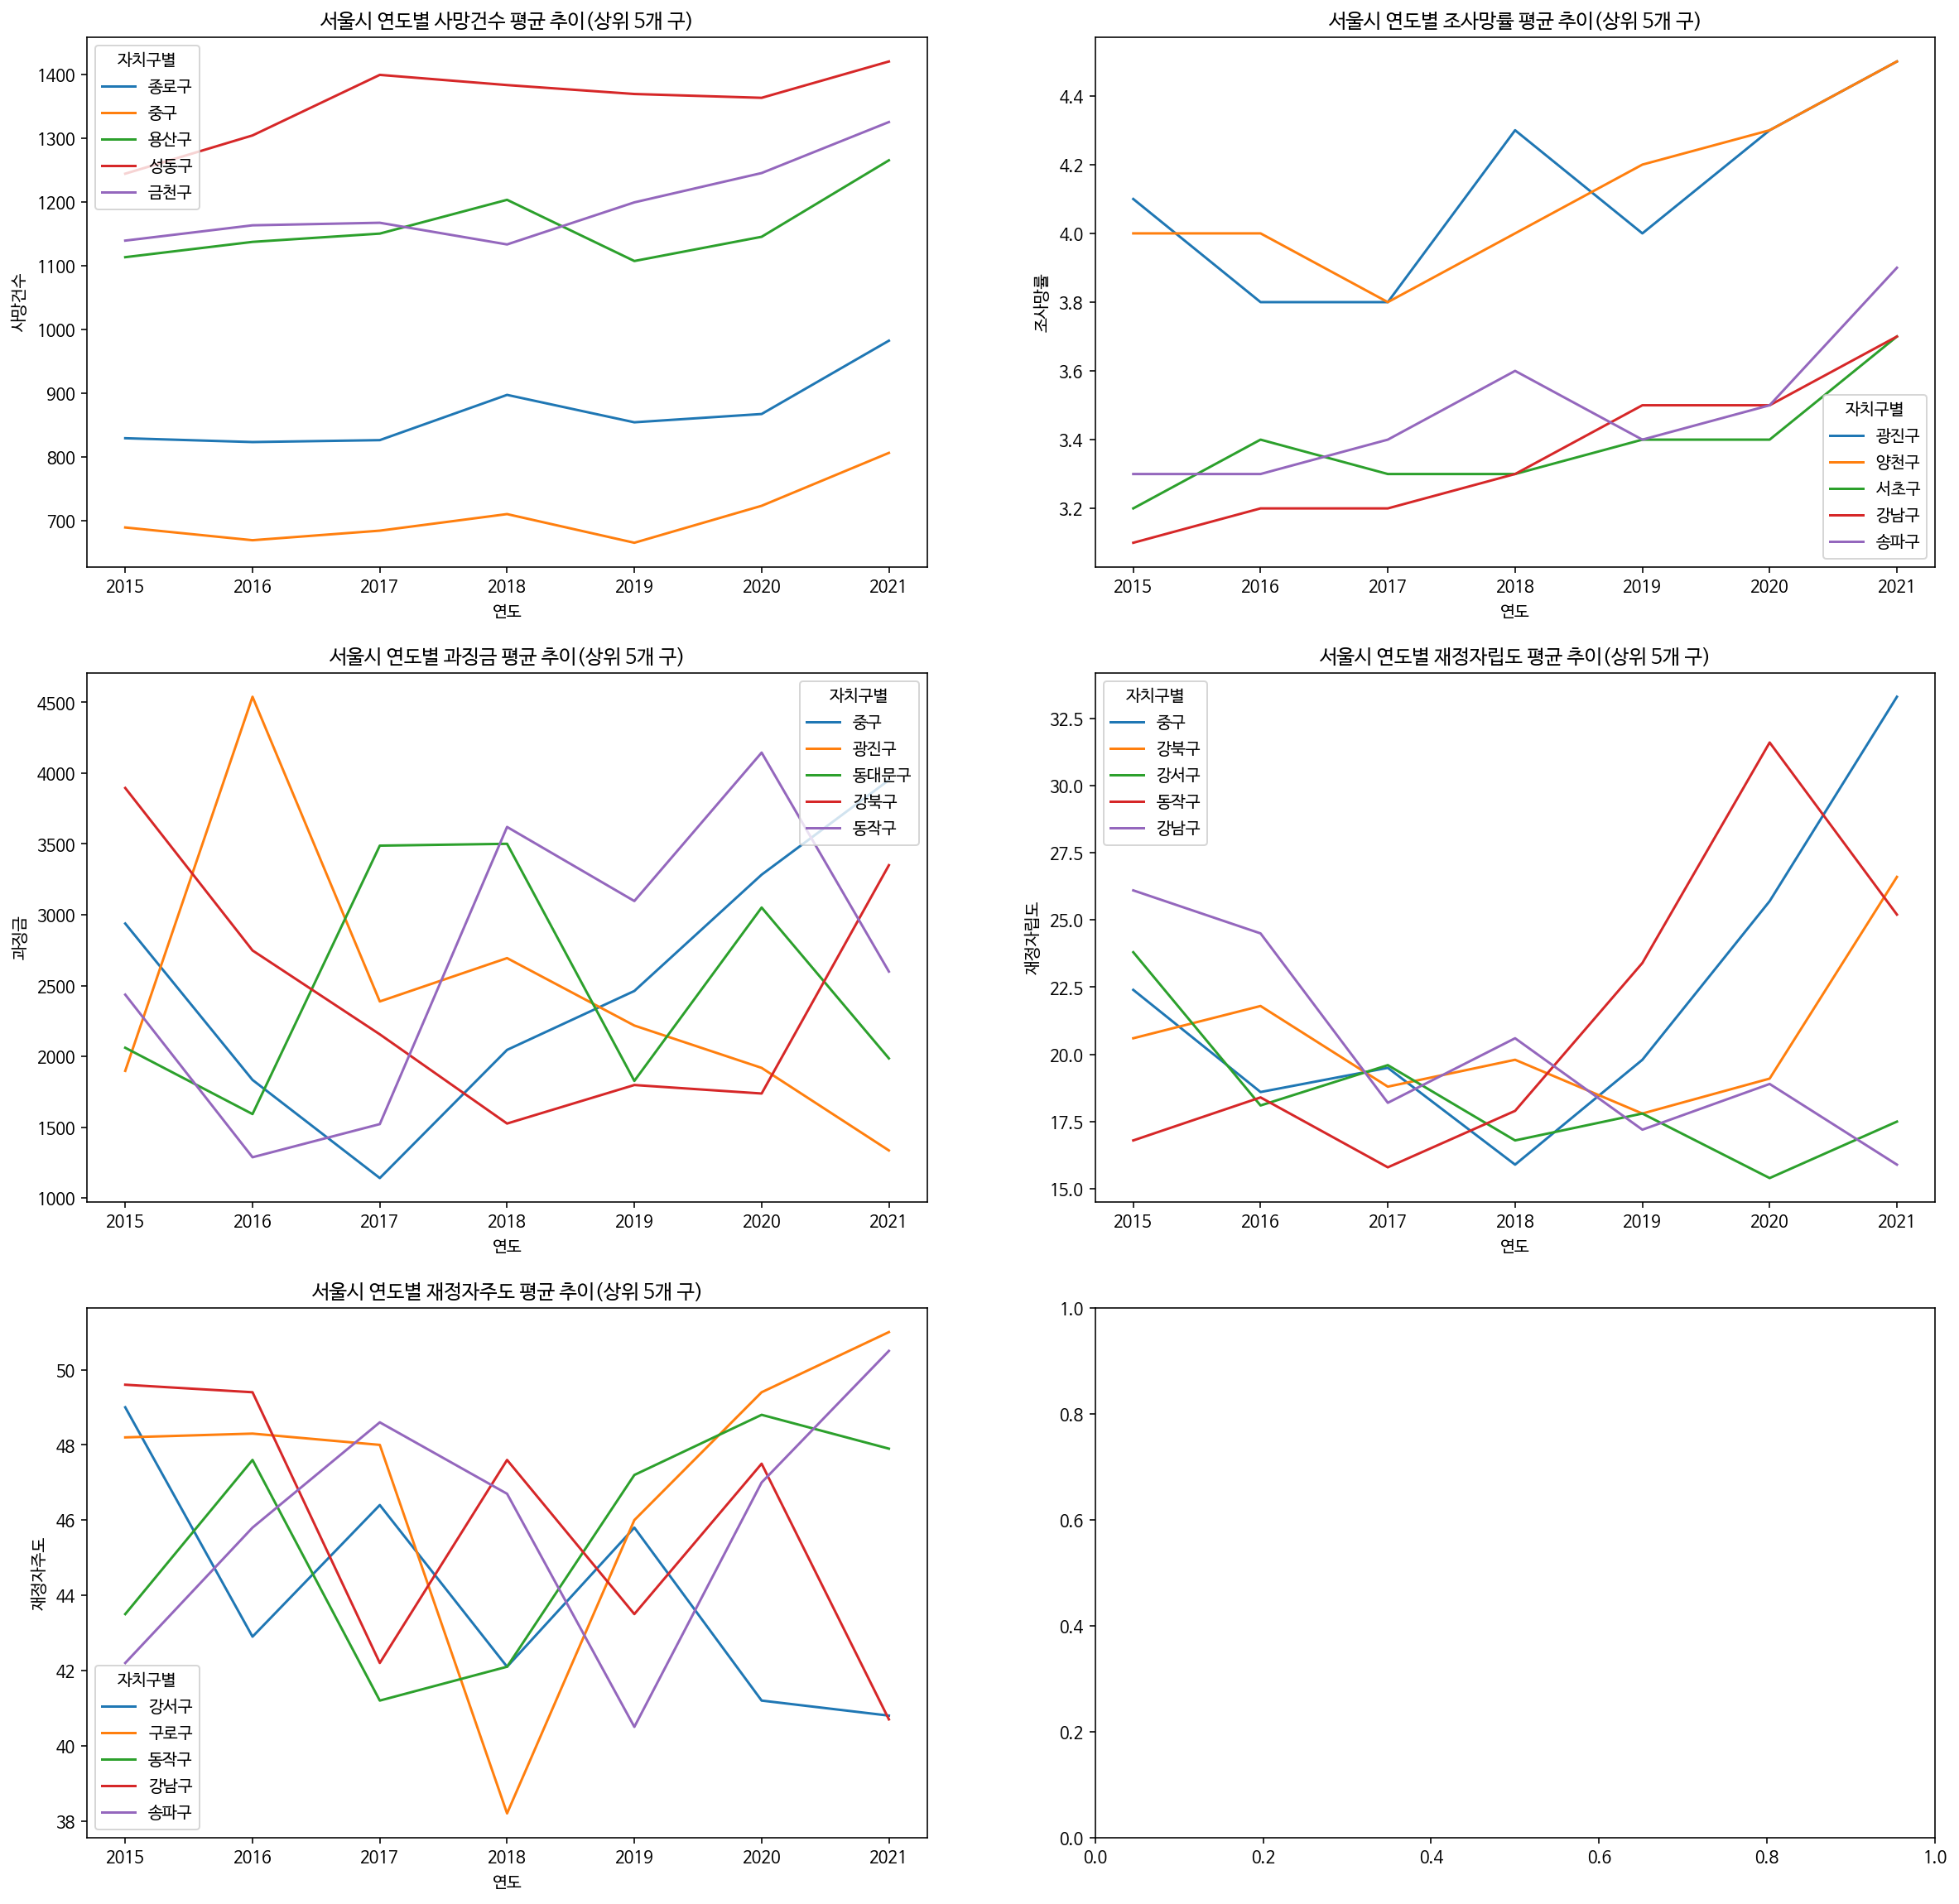

In [87]:
# 각 지표 상위 5개 구별 추이 살펴보기
fig, ax = plt.subplots(3, 2, figsize=(20, 20))
for i, title in enumerate(df_data.columns[2:]):
  top_n = df_data.groupby("자치구별").mean().reset_index().sort_values(title).head(5)['자치구별'].values
  df_temp = df_data[df_data['자치구별'].isin(top_n)]
  sns.lineplot(x=df_temp["연도"], y=df_temp[title], hue=df_temp['자치구별'], ax=ax[i//2, i%2])
  ax[i//2, i%2].set_title(f"서울시 연도별 {title} 평균 추이(상위 5개 구)")
  # 지표별 추이가 너무 다르다...

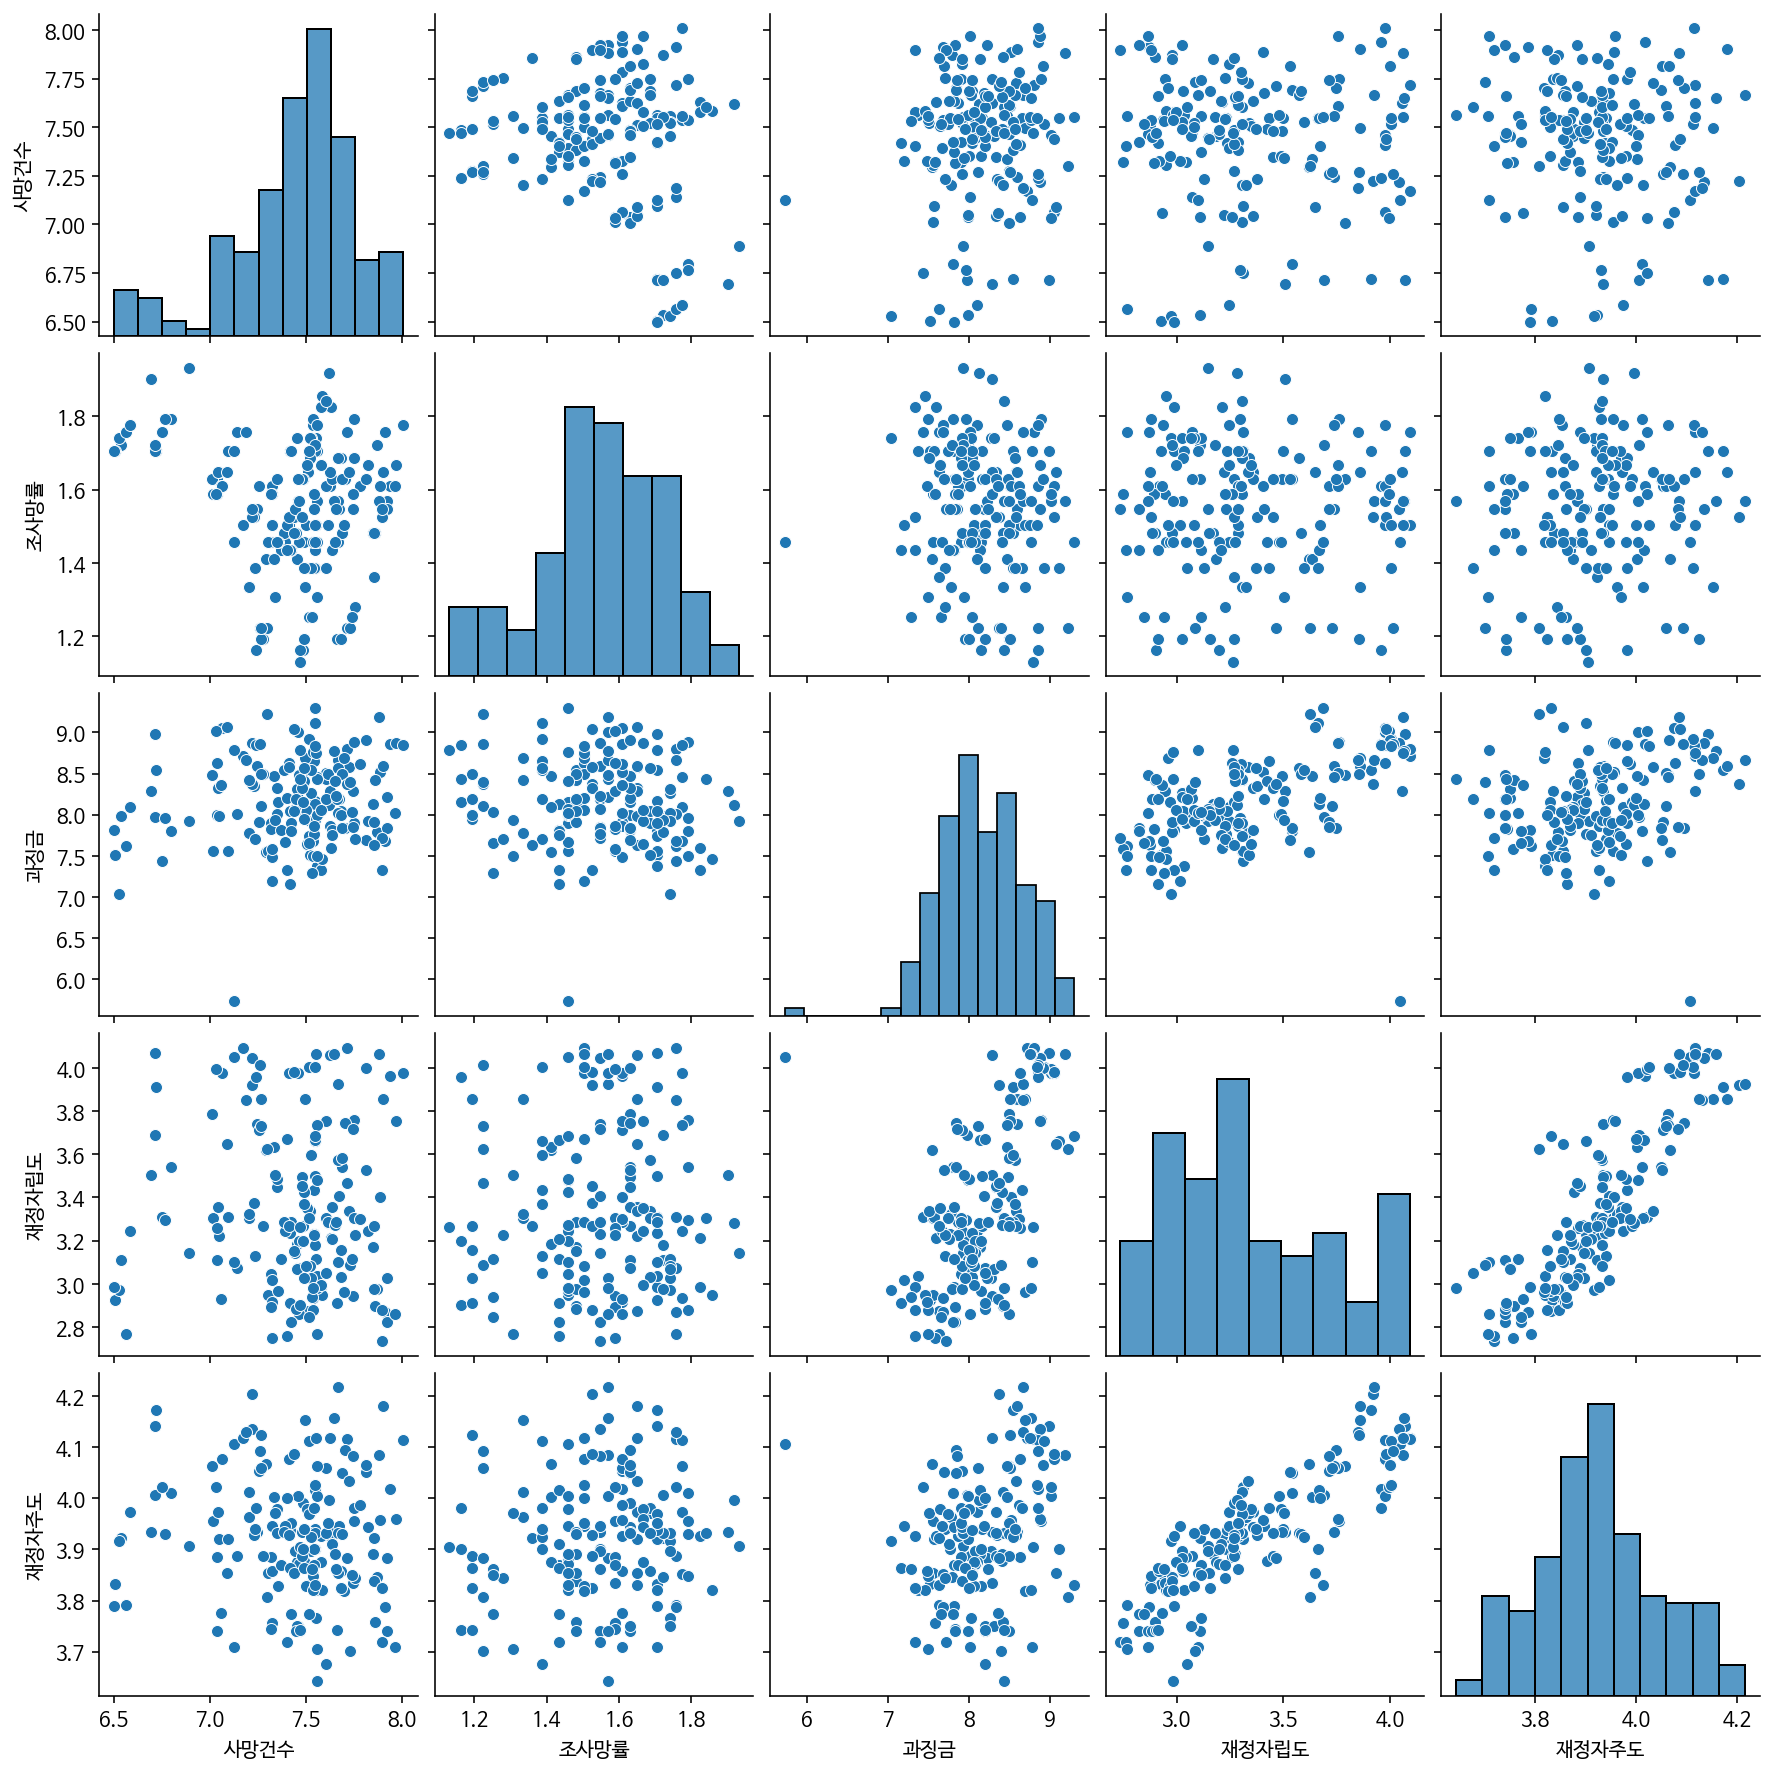

In [88]:
# 각 항목별 scatter plot 및 히스토그램 보기(pairplot)
sns.pairplot(df_data_log)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

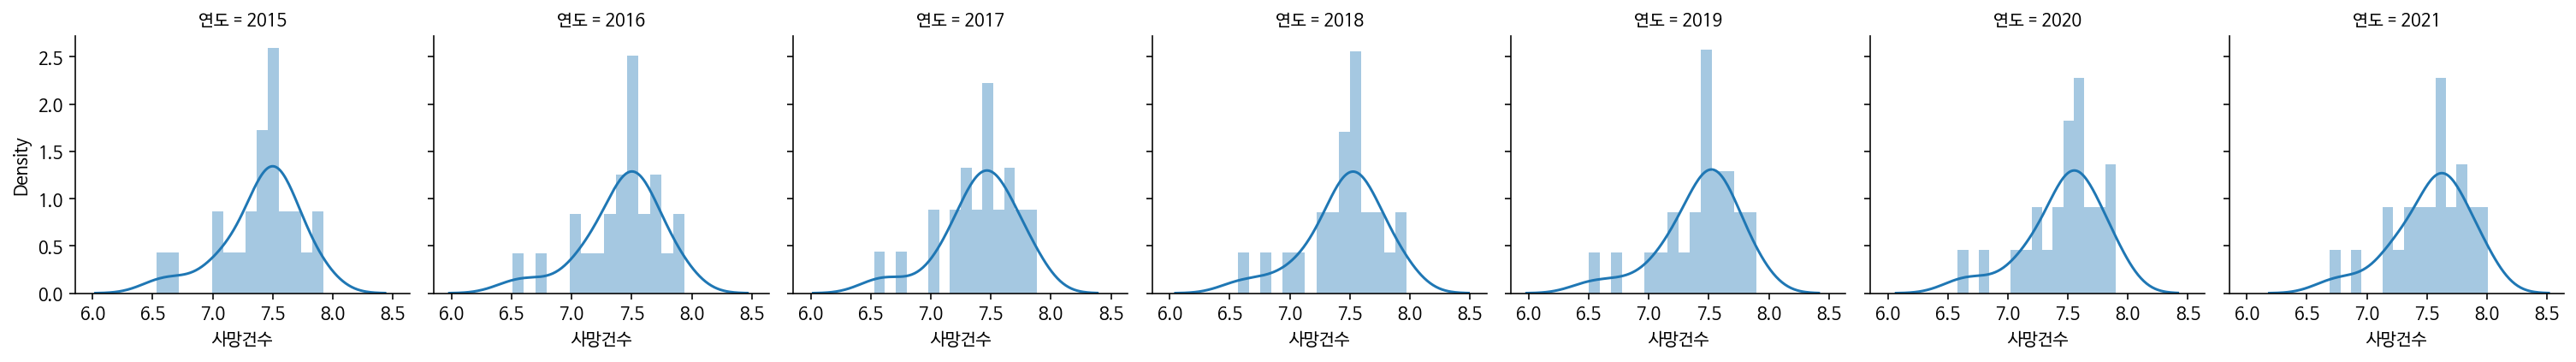

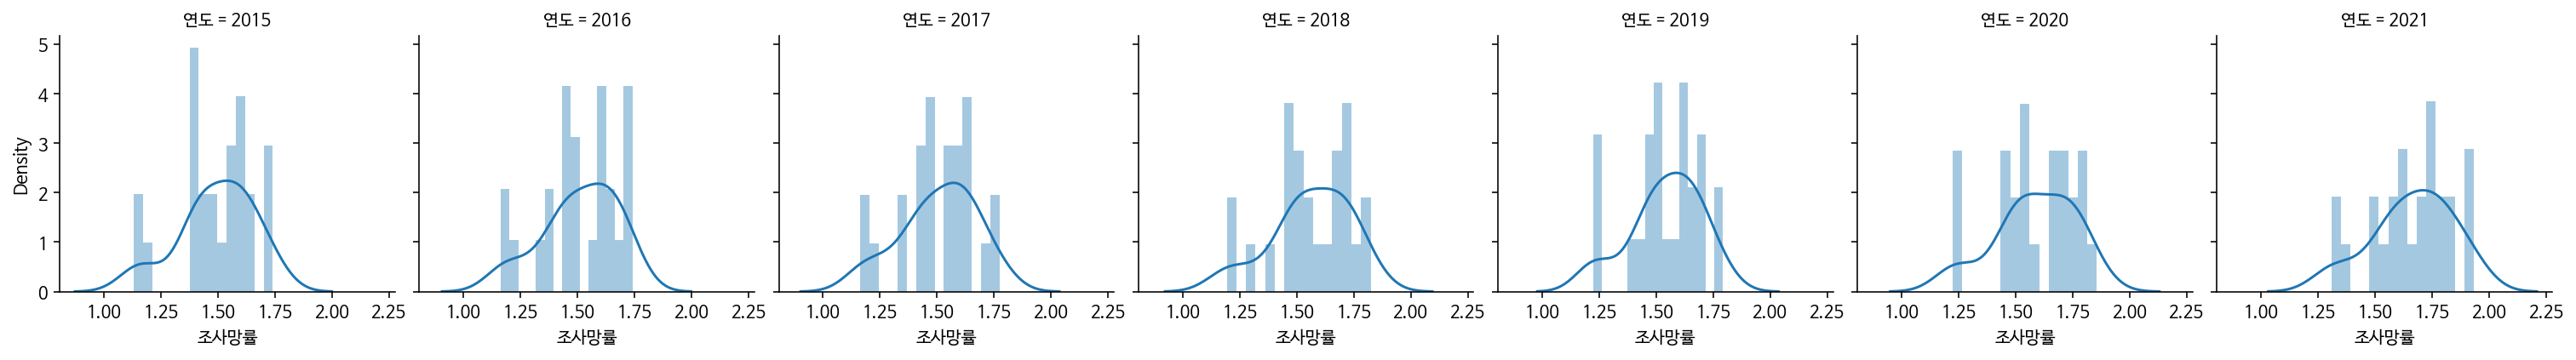

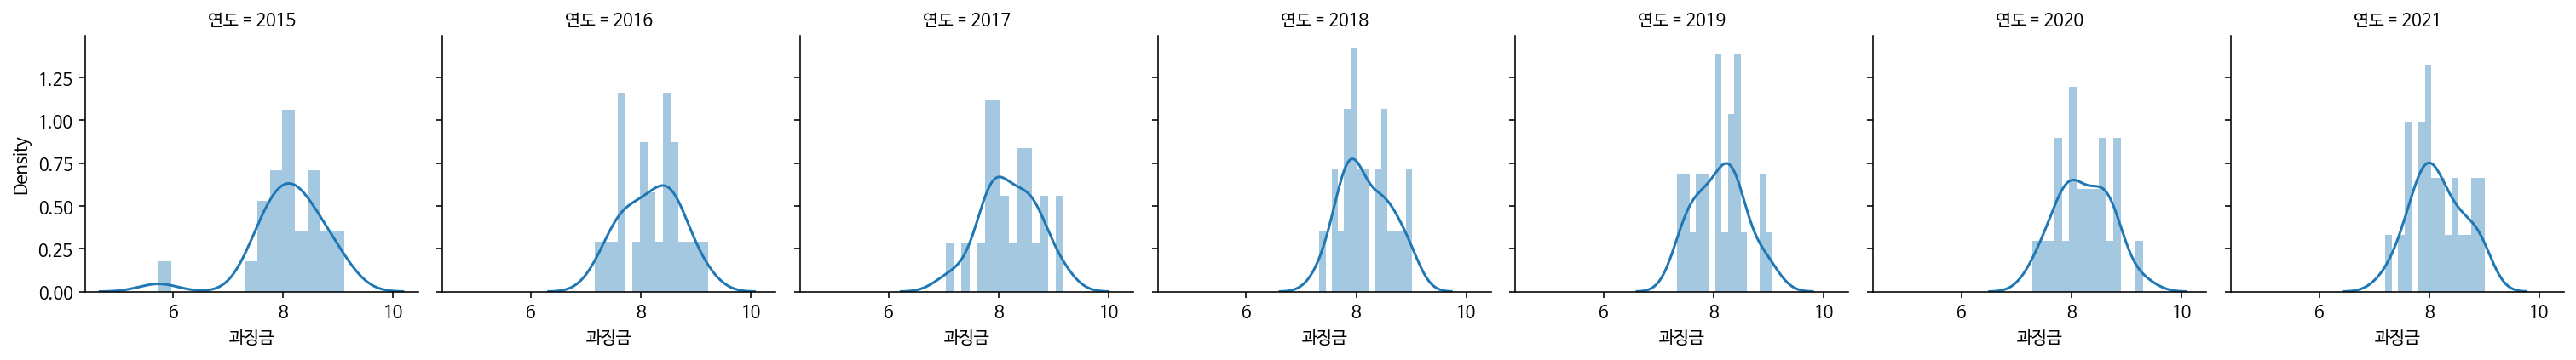

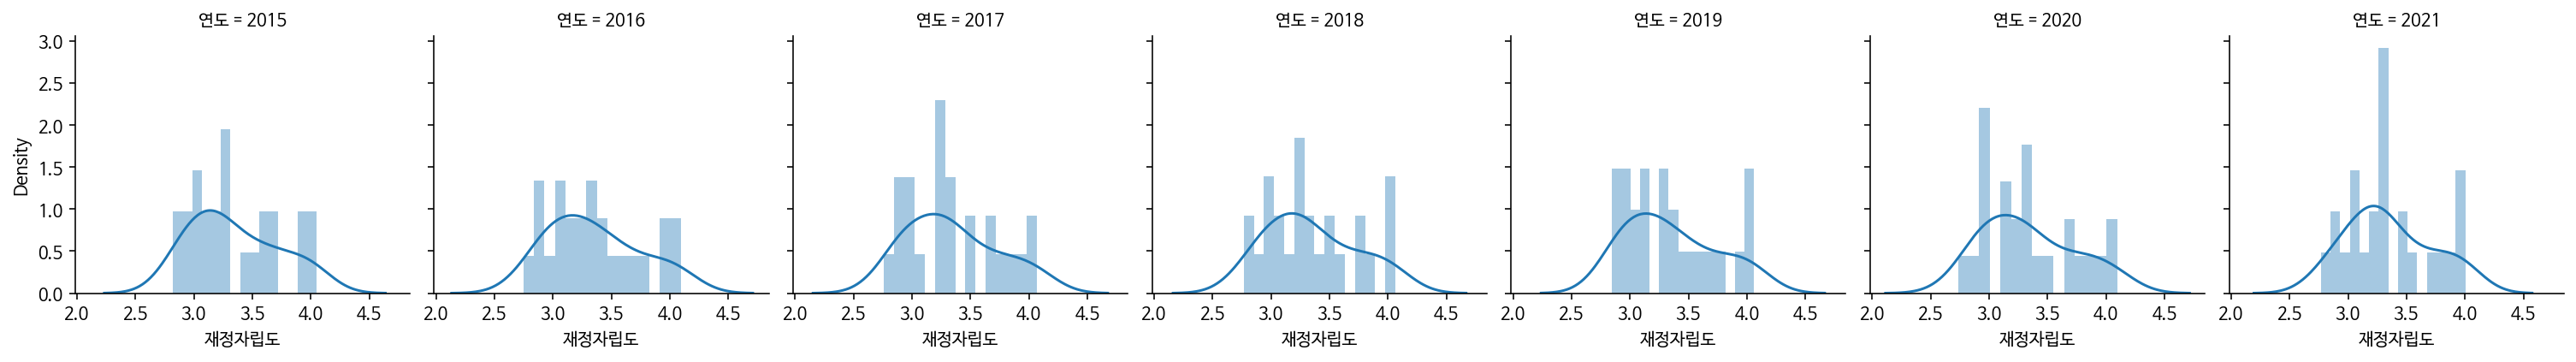

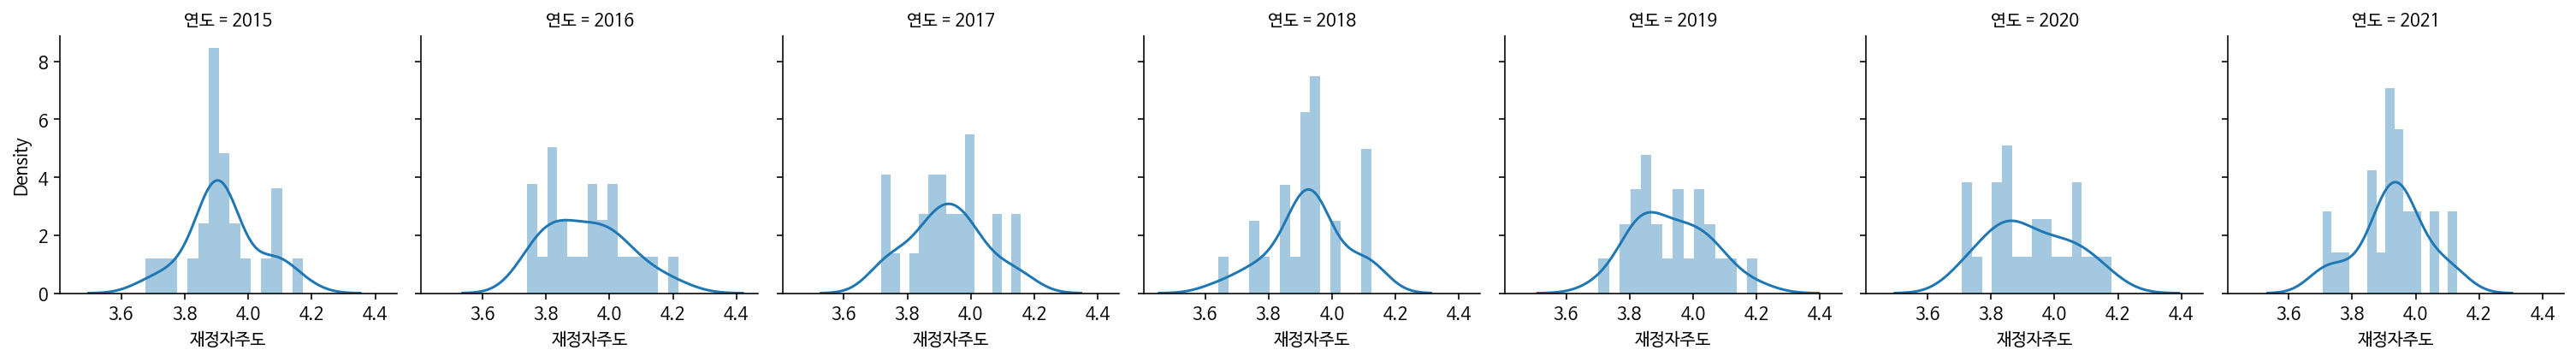

In [89]:
# 연도별 재정 자립도 distplot 보기

# def plot(*args, **kwargs):
#   # plt.figure(figsize=(28, 4))
#   sns.distplot(*args, **kwargs)
for row in ["사망건수", "조사망률", "과징금", "재정자립도", "재정자주도"]:
  g = sns.FacetGrid(data=df_data_log, col='연도', col_wrap=7)
  g.map(sns.distplot, row, bins=15)

Text(0.5, 1.0, 'correlation p-value')

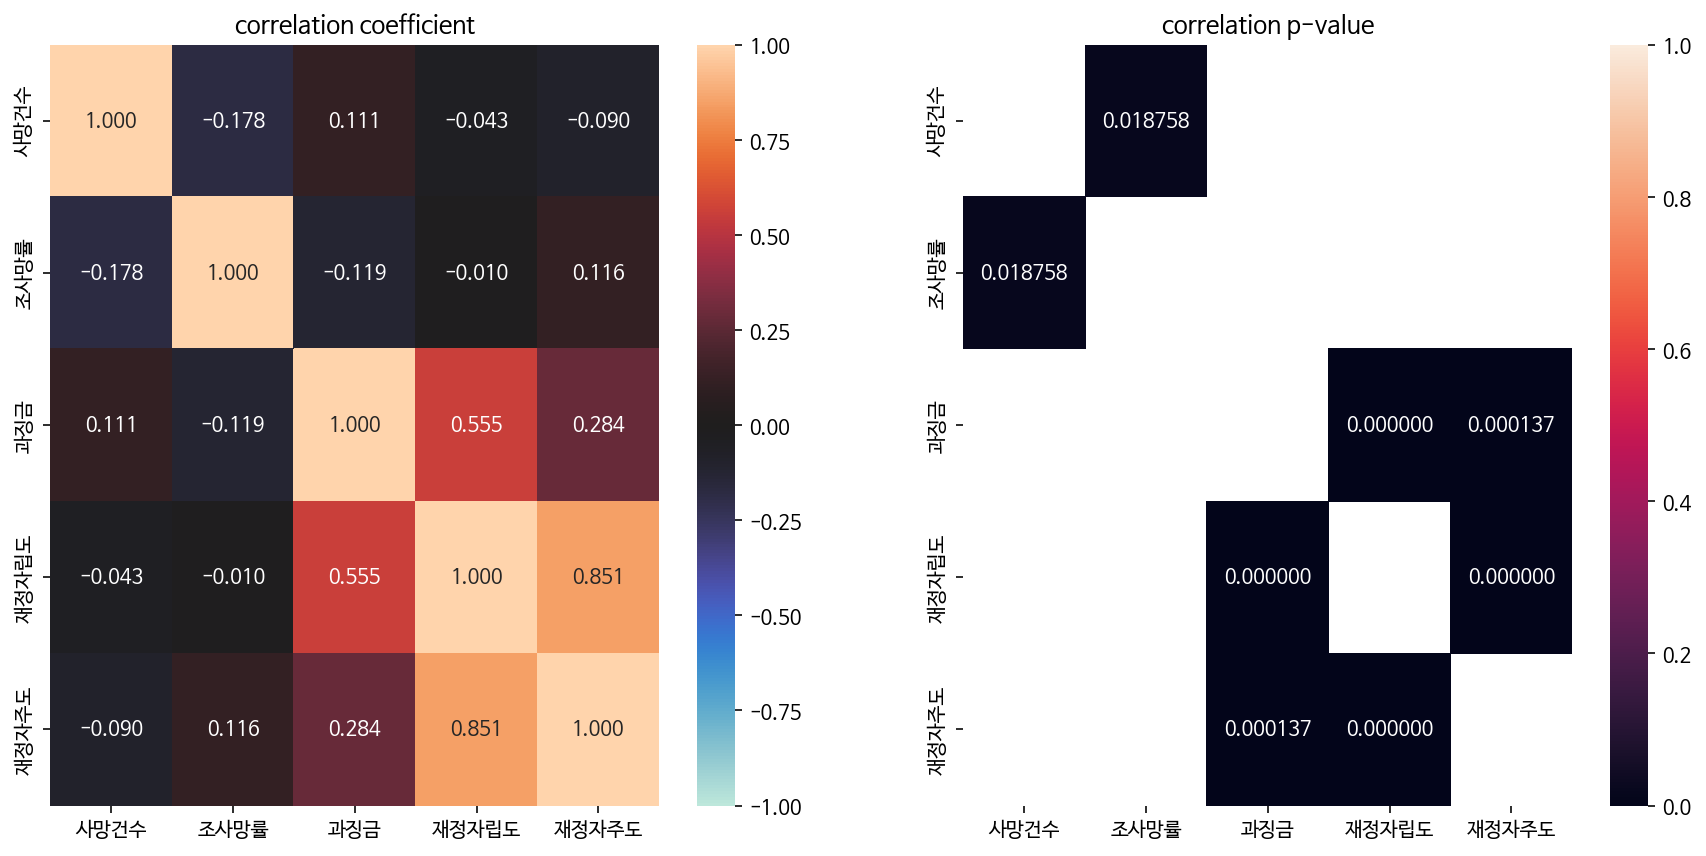

In [90]:
#단순 pearson 상관분석계수 heatmap화 해보기
#과징금, 재정자립도, 재정자주도로 분석
from scipy.stats import pearsonr

method = pearsonr
df_temp = df_data_log[:]

#log 씌우기
# df_temp[['과징금','재정자립도','재정자주도']] = np.log(df_temp[['과징금','재정자립도','재정자주도']])

fig, ((ax1),(ax2)) = plt.subplots(nrows=1, ncols=2, figsize=(15, 7))
sns.heatmap(
    ax=ax1, 
    data=df_temp.corr(method=lambda x, y: method(x, y)[0]), 
    vmin=-1, 
    vmax=1,
    fmt='.3f',
    annot=True,
    cmap='icefire')
ax1.set_title("correlation coefficient")

df_pval = df_temp.corr(method=lambda x, y: method(x, y)[1])
sns.heatmap(
    ax=ax2, 
    data=df_pval,
    mask=df_pval >= 0.05, #0.05 이상이면 없앰
    vmin=0, 
    vmax=1,
    fmt='.6f', 
    annot=True
    )
ax2.set_title("correlation p-value")

In [91]:
df_data_log.groupby('연도').mean()

사망건수      조사망률       과징금     재정자립도     재정자주도
연도                                                    
2015  7.405642  1.492510  8.101076  3.348426  3.923551
2016  7.414608  1.510248  8.187482  3.354059  3.928165
2017  7.403620  1.506277  8.198297  3.344612  3.925133
2018  7.453379  1.563293  8.171000  3.348309  3.924906
2019  7.422900  1.542303  8.112709  3.352605  3.931207
2020  7.461133  1.585007  8.221547  3.340563  3.923886
2021  7.531486  1.663049  8.158063  3.352719  3.926498

In [92]:
#과징금이 가장 많았던 년도
df_data_log.groupby('연도').mean()

사망건수      조사망률       과징금     재정자립도     재정자주도
연도                                                    
2015  7.405642  1.492510  8.101076  3.348426  3.923551
2016  7.414608  1.510248  8.187482  3.354059  3.928165
2017  7.403620  1.506277  8.198297  3.344612  3.925133
2018  7.453379  1.563293  8.171000  3.348309  3.924906
2019  7.422900  1.542303  8.112709  3.352605  3.931207
2020  7.461133  1.585007  8.221547  3.340563  3.923886
2021  7.531486  1.663049  8.158063  3.352719  3.926498

# 상관분석

## 가설 설정

In [93]:
df_data["과징금"] = df_data["과징금"].apply(float)
df_data["사망건수"] = df_data["사망건수"].apply(float)
df_data["조사망률"] = df_data["조사망률"].apply(float)
df_data

연도 자치구별    사망건수  조사망률      과징금  재정자립도  재정자주도
0    2015  종로구   829.0   5.5   5154.0   50.0   64.9
1    2016  종로구   823.0   5.5   7971.0   58.6   62.9
2    2017  종로구   826.0   5.6   2905.0   40.1   54.9
3    2018  종로구   897.0   6.0   2450.0   34.5   55.2
4    2019  종로구   854.0   5.8   1698.0   27.4   55.8
..    ...  ...     ...   ...      ...    ...    ...
170  2017  강동구  1877.0   4.3   6379.0   19.7   45.6
171  2018  강동구  1905.0   4.5   6316.0   58.2   61.4
172  2019  강동구  1898.0   4.5   6901.0   54.9   56.0
173  2020  강동구  1901.0   4.3  10918.0   39.8   46.1
174  2021  강동구  2122.0   4.7   3760.0   26.7   47.5

[175 rows x 7 columns]

## 상관 분석 조건 확인

In [94]:
df_2015 = df_data[df_data["연도"]=="2015"]
df_2015
df_2016 = df_data[df_data["연도"]=="2016"]
df_2016
df_2017 = df_data[df_data["연도"]=="2017"]
df_2017
df_2018 = df_data[df_data["연도"]=="2018"]
df_2018
df_2019 = df_data[df_data["연도"]=="2019"]
df_2019
df_2020 = df_data[df_data["연도"]=="2020"]
df_2020
df_2021 = df_data[df_data["연도"]=="2021"]
df_2021

연도  자치구별    사망건수  조사망률     과징금  재정자립도  재정자주도
6    2021   종로구   982.0   6.9  2763.0   23.2   49.7
13   2021    중구   806.0   6.7  3951.0   33.3   51.1
20   2021   용산구  1265.0   5.8  3006.0   21.6   48.8
27   2021   성동구  1420.0   5.0  2738.0   41.0   57.6
34   2021   광진구  1516.0   4.5  1336.0   20.4   51.7
41   2021  동대문구  2061.0   6.2  1986.0   24.8   50.7
48   2021   중랑구  2319.0   6.0  7201.0   42.9   52.2
55   2021   성북구  2320.0   5.4  2683.0   27.2   53.6
62   2021   강북구  2036.0   6.8  3350.0   26.6   54.4
69   2021   도봉구  2004.0   6.3  4589.0   27.2   51.0
76   2021   노원구  3007.0   5.9  6964.0   53.4   61.2
83   2021   은평구  2735.0   5.8  2152.0   17.6   44.1
90   2021  서대문구  1728.0   5.7  4052.0   21.5   42.5
97   2021   마포구  1735.0   4.8  8160.0   53.3   54.8
104  2021   양천구  2027.0   4.5  4876.0   26.7   52.0
111  2021   강서구  2884.0   5.0  3023.0   17.5   40.8
118  2021   구로구  2137.0   5.4  5237.0   35.7   51.0
125  2021   금천구  1325.0   5.8  5811.0   47.0   62.2
132  2021  영등포구  1958.0   5.3  3169.0   20.0   48.2
139  2021   동작구  1890.0   4.9  2599.0   25.2   47.9
146  2021   관악구  2481.0   5.1  7414.0   54.7   58.3
153  2021   서초구  1541.0   3.7  2805.0   33.2   53.0
160  2021   강남구  1920.0   3.7  1801.0   15.9   40.7
167  2021   송파구  2579.0   3.9  2059.0   26.3   50.5
174  2021   강동구  2122.0   4.7  3760.0   26.7   47.5

In [95]:
#정규성 검증 : 샤피로 테스트
import math
from scipy.stats import shapiro, pearsonr
#연도별 사망률 data 정규성 검정      #2015~2021년
  
print(shapiro(df_2015["조사망률"]))
print(shapiro(df_2015["과징금"]))         
print("기각",shapiro(df_2015["재정자립도"]))
print(shapiro(df_2015["재정자주도"]))

print(shapiro(df_2016["조사망률"]))
print(shapiro(df_2016["과징금"]))
print("기각",shapiro(df_2016["재정자립도"]))
print(shapiro(df_2016["재정자주도"]))

print(shapiro(df_2017["조사망률"]))
print("기각",shapiro(df_2017["과징금"]))
print("기각",shapiro(df_2017["재정자립도"]))
print(shapiro(df_2017["재정자주도"]))

print(shapiro(df_2018["조사망률"]))
print("기각",shapiro(df_2018["과징금"]))
print("기각",shapiro(df_2018["재정자립도"]))
print(shapiro(df_2018["재정자주도"]))

print(shapiro(df_2019["조사망률"]))
print("기각",shapiro(df_2019["과징금"]))
print("기각",shapiro(df_2019["재정자립도"]))
print(shapiro(df_2019["재정자주도"]))

print(shapiro(df_2020["조사망률"]))
print("기각",shapiro(df_2020["과징금"]))
print("기각",shapiro(df_2020["재정자립도"]))
print(shapiro(df_2020["재정자주도"]))

print(shapiro(df_2021["조사망률"]))
print("기각",shapiro(df_2021["과징금"]))
print("기각",shapiro(df_2021["재정자립도"]))
print(shapiro(df_2021["재정자주도"]))
#𝐻0: data가 normal distribution을 따른다. (p-value > 0.05 인경우)   
#  p-value < 0.05 , data가 normal을 따른다고 볼 수 없다.
#  (적어도 한 변수가 정규성) 을 만족해야 피어슨 검정 가능
# 사망률이 정규성을 띄므로 사망률과 재정지표(변수3개) 간의 상관분석 가능. (적어도 한 변수가 정규)

ShapiroResult(statistic=0.9629961848258972, pvalue=0.477317750453949)
ShapiroResult(statistic=0.9267788529396057, pvalue=0.07324983924627304)
기각 ShapiroResult(statistic=0.8744991421699524, pvalue=0.005332259926944971)
ShapiroResult(statistic=0.9378538727760315, pvalue=0.13204850256443024)
ShapiroResult(statistic=0.9557936191558838, pvalue=0.3370780646800995)
ShapiroResult(statistic=0.925374448299408, pvalue=0.06800099462270737)
기각 ShapiroResult(statistic=0.8749893307685852, pvalue=0.005456022918224335)
ShapiroResult(statistic=0.9488542079925537, pvalue=0.23621679842472076)
ShapiroResult(statistic=0.9693901538848877, pvalue=0.6296417117118835)
기각 ShapiroResult(statistic=0.9188416004180908, pvalue=0.04821658506989479)
기각 ShapiroResult(statistic=0.8694882988929749, pvalue=0.004225042648613453)
ShapiroResult(statistic=0.9607356786727905, pvalue=0.42932265996932983)
ShapiroResult(statistic=0.9639053344726562, pvalue=0.49759286642074585)
기각 ShapiroResult(statistic=0.8999488949775696, pvalue=

피어슨의 상관계수를 통한 상관분석 진행.
전제 1. 두 변수는 모두 연속형 변수 (만족)
     2. 두 변수중 적어도 한 변수는 정규성 만족해야함 (만족)

In [96]:
print(pearsonr(df_2015["조사망률"],df_2015["과징금"])[1]) #p값 검증해보기.
print(pearsonr(df_2015["조사망률"],df_2015["재정자립도"])[1])
print(pearsonr(df_2015["조사망률"],df_2015["재정자주도"])[1])
print(pearsonr(df_2016["조사망률"],df_2016["과징금"])[1]) #p값 검증해보기.
print(pearsonr(df_2016["조사망률"],df_2016["재정자립도"])[1])
print(pearsonr(df_2016["조사망률"],df_2016["재정자주도"])[1])
print(pearsonr(df_2017["조사망률"],df_2017["과징금"])[1]) #p값 검증해보기.
print(pearsonr(df_2017["조사망률"],df_2017["재정자립도"])[1])
print(pearsonr(df_2017["조사망률"],df_2017["재정자주도"])[1])
print(pearsonr(df_2018["조사망률"],df_2018["과징금"])[1]) #p값 검증해보기.
print(pearsonr(df_2018["조사망률"],df_2018["재정자립도"])[1])
print(pearsonr(df_2018["조사망률"],df_2018["재정자주도"])[1])
print(pearsonr(df_2019["조사망률"],df_2019["과징금"])[1]) #p값 검증해보기.
print(pearsonr(df_2019["조사망률"],df_2019["재정자립도"])[1])
print(pearsonr(df_2019["조사망률"],df_2019["재정자주도"])[1])
print(pearsonr(df_2020["조사망률"],df_2020["과징금"])[1]) #p값 검증해보기.
print(pearsonr(df_2020["조사망률"],df_2020["재정자립도"])[1])
print(pearsonr(df_2020["조사망률"],df_2020["재정자주도"])[1])
print(pearsonr(df_2021["조사망률"],df_2021["과징금"])[1]) #p값 검증해보기.
print(pearsonr(df_2021["조사망률"],df_2021["재정자립도"])[1])
print(pearsonr(df_2021["조사망률"],df_2021["재정자주도"])[1])    
#p값이 0.05보다 클 경우 상관계수가 유의미하지않음.
# 따라서 상관계수가 유의미하지 않기 때문에, 가설을 수정한다.

0.17911941791637587
0.5344828437449036
0.27002780007895144
0.23272065823024488
0.655152037900803
0.43410393367675426
0.44390499834837976
0.8569265389962323
0.5655726525765857
0.1162417660593549
0.3099870355021567
0.6323227916848723
0.23654422595364824
0.8267838970848398
0.4553290142017852
0.9408580914906292
0.9914670568040254
0.8365628842687138
0.3828335943587176
0.7205359830811383
0.3932360194737457


In [97]:
# 재정지표내에서, 과징금과 재정자주도의 상관관계만을 분석한다.

print(pearsonr(df_2015["과징금"],df_2015["재정자주도"])[1]) #p값 검증해보기. 
print(pearsonr(df_2016["과징금"],df_2016["재정자주도"])[1])
print(pearsonr(df_2017["과징금"],df_2017["재정자주도"])[1])
print(pearsonr(df_2018["과징금"],df_2018["재정자주도"])[1])
print(pearsonr(df_2019["과징금"],df_2019["재정자주도"])[1])
print(pearsonr(df_2020["과징금"],df_2020["재정자주도"])[1])
print(pearsonr(df_2021["과징금"],df_2021["재정자주도"])[1])    
#p값이 0.05보다 큰경우 상관계수가 유의미하지않음.
# 2017,2018,2021 data의 상관계수만 유의하므로, 3개 년도에 대하여 상관분석을 진행한다.

0.6787024950006465
0.06856711544413292
0.0041243537388063805
0.03306169368673136
0.292456918912491
0.2546278151280631
0.0060331967732798275


In [98]:
# 상관계수 값 추출.
a1 = pearsonr(df_2017["과징금"],df_2017["재정자주도"])[0]
b1 = pearsonr(df_2018["과징금"],df_2018["재정자주도"])[0]
c1 = pearsonr(df_2021["과징금"],df_2021["재정자주도"])[0]

In [99]:
# 2017, 2018, 2021 년도
df_final = pd.DataFrame({"2017": [round(a1,3)],
                         "2018": [round(b1,3)],
                         "2021": [round(c1,3)]},
                         index=['재정자주도'])
df_final
# 연도별 과징금과 재정자주도의 상관계수 데이터프레임

2017   2018   2021
재정자주도  0.553  0.427  0.533

### 가설검정
귀무가설 (H0) :모 집단에서 두변수 사이에 선형적인 상관성이 없다.
대립가설 (H1): 모 집단에서 두변수 사이에 선형적인 상관성이 있다.

## 상관 분석 진행 및 결과 정리

# 회귀분석


In [100]:
# 위의 결과, 2017,2018,2021년도에서 과징금과 재정자주도의 상관관계가 있었으므로, 남쪽전체 및 북쪽전체 의 과징금과 재정자주도 간의 관계 분석
# 서울 북쪽에 있는 구 전체병합, 남쪽에 있는 구 전체병합
#강북: 은평구,마포구,서대문구,종로구,중구,용산구,성북구,강북구,도봉구,노원구,동대문구,성동구,중랑구,광진구
#강남 : 강서구, 양천구,구로구,영등포구,금천구,동작구,관악구,서초구,강남구,송파구,강동구

df_data["과징금"] = df_data["과징금"].apply(float)
df_sn = df_data
for gu in df_data["자치구별"].unique():
  if(gu == "구로구" or gu == "영등포구" or gu == "동대문구" or gu == "용산구" or gu == "금천구" or gu == "관악구" or gu == "광진구" or gu == "서대문구"):    
    df_sn.loc[df_sn['자치구별'] == gu, '강'] = 1
  else:
    df_sn.loc[df_sn['자치구별'] == gu, '강'] = 2

In [101]:
South = df_sn[df_sn["강"]==1]
North = df_sn[df_sn["강"]==2]

South2015 = South[South['연도']=='2015']
South2016 = South[South['연도']=='2016']
South2017 = South[South['연도']=='2017']
South2018 = South[South['연도']=='2018'] 
South2019 = South[South['연도']=='2019']
South2020 = South[South['연도']=='2020']
South2021 = South[South['연도']=='2021']

South_15 = np.log(South2015[['과징금','재정자주도']])
South_16 = np.log(South2016[['과징금','재정자주도']])
South_17 = np.log(South2017[['과징금','재정자주도']])
South_18 = np.log(South2018[['과징금','재정자주도']])
South_19 = np.log(South2019[['과징금','재정자주도']])
South_20 = np.log(South2020[['과징금','재정자주도']])
South_21 = np.log(South2021[['과징금','재정자주도']])

North2017 = North[North['연도']=='2017']
North2018 = North[North['연도']=='2018'] 
North2021 = North[North['연도']=='2021']

North_17 = North2017[['연도','과징금','재정자주도']]
North_18 = North2018[['연도','과징금','재정자주도']]
North_21 = North2021[['연도','과징금','재정자주도']]

In [102]:
df_2015 = South[South["연도"]=="2015"]
df_2015
df_2016 = South[South["연도"]=="2016"]
df_2016
df_2017 = South[South["연도"]=="2017"]
df_2017
df_2018 = South[South["연도"]=="2018"]
df_2018
df_2019 = South[South["연도"]=="2019"]
df_2019
df_2020 = South[South["연도"]=="2020"]
df_2020
df_2021 = South[South["연도"]=="2021"]
df_2021

연도  자치구별    사망건수  조사망률     과징금  재정자립도  재정자주도    강
20   2021   용산구  1265.0   5.8  3006.0   21.6   48.8  1.0
34   2021   광진구  1516.0   4.5  1336.0   20.4   51.7  1.0
41   2021  동대문구  2061.0   6.2  1986.0   24.8   50.7  1.0
90   2021  서대문구  1728.0   5.7  4052.0   21.5   42.5  1.0
118  2021   구로구  2137.0   5.4  5237.0   35.7   51.0  1.0
125  2021   금천구  1325.0   5.8  5811.0   47.0   62.2  1.0
132  2021  영등포구  1958.0   5.3  3169.0   20.0   48.2  1.0
146  2021   관악구  2481.0   5.1  7414.0   54.7   58.3  1.0

In [103]:
print(South_15)
#data수가 15개 이하로 작기 때문에 이상치 제거는 생략한다.
#이상치 관련 추가언급 필요.

          과징금     재정자주도
14   7.552237  3.955082
28   7.548556  4.067316
35   7.630947  3.830813
84   7.486613  3.858622
112  8.097731  3.875359
119  8.631593  3.885679
126  9.041803  4.085976
140  8.190909  3.676301


In [104]:
#정규성 검증 : 샤피로 테스트
import math
from scipy.stats import shapiro, pearsonr
#강북, 강남 data 정규성 검정  

print(shapiro(South_15["과징금"]))
print(shapiro(South_15["재정자주도"]))


print(shapiro(South_16["과징금"]))
print(shapiro(South_16["재정자주도"]))

print(shapiro(South_17["과징금"]))
print(shapiro(South_17["재정자주도"]))
#print(shapiro(North_17["과징금"]))
#print(shapiro(North_17["재정자주도"]))

print(shapiro(South_18["과징금"]))
print(shapiro(South_18["재정자주도"]))
#print("기각",shapiro(North_18["과징금"]))
#print(shapiro(North_18["재정자주도"]))

print(shapiro(South_19["과징금"]))
print(shapiro(South_19["재정자주도"]))

print(shapiro(South_20["과징금"]))
print(shapiro(South_20["재정자주도"]))

print(shapiro(South_21["과징금"]))
print(shapiro(South_21["재정자주도"]))
#print(shapiro(North_21["과징금"]))
#print(shapiro(North_21["재정자주도"]))
#𝐻0: data가 normal distribution을 따른다. (p-value > 0.05 인경우)   
#  p-value < 0.05 , data가 normal을 따른다고 볼 수 없다.
#  (적어도 한 변수가 정규성) 을 만족해야 피어슨 검정 가능
# 18년도 강북의 과징금 data 정규성x.  나머지는 모두 만족.
# 적어도 하나 만족하므로 피어슨 가능.

ShapiroResult(statistic=0.8674551248550415, pvalue=0.14231452345848083)
ShapiroResult(statistic=0.9421419501304626, pvalue=0.6322709321975708)
ShapiroResult(statistic=0.882575273513794, pvalue=0.19927720725536346)
ShapiroResult(statistic=0.8913214802742004, pvalue=0.24073578417301178)
ShapiroResult(statistic=0.7337550520896912, pvalue=0.005392231047153473)
ShapiroResult(statistic=0.9572427868843079, pvalue=0.7834644913673401)
ShapiroResult(statistic=0.9878116846084595, pvalue=0.9909546375274658)
ShapiroResult(statistic=0.7222868204116821, pvalue=0.004014125093817711)
ShapiroResult(statistic=0.9690233469009399, pvalue=0.890235424041748)
ShapiroResult(statistic=0.9520743489265442, pvalue=0.7321180105209351)
ShapiroResult(statistic=0.9492775201797485, pvalue=0.7039443850517273)
ShapiroResult(statistic=0.9481249451637268, pvalue=0.6923136115074158)
ShapiroResult(statistic=0.968078076839447, pvalue=0.8825141191482544)
ShapiroResult(statistic=0.9490790963172913, pvalue=0.7019420266151428)


In [105]:
print(pearsonr(South_17["과징금"],South_17["재정자주도"])) #p값 검증해보기. 
print(pearsonr(South_18["과징금"],South_18["재정자주도"]))
print(pearsonr(South_21["과징금"],South_21["재정자주도"]))
print(pearsonr(North_17["과징금"],North_17["재정자주도"]))
print(pearsonr(North_18["과징금"],North_18["재정자주도"]))
print(pearsonr(North_21["과징금"],North_21["재정자주도"]))    # (상관계수값, p값) 이 출력됨.   
#p값이 0.05보다 큰경우 상관계수가 유의미하지않음.
# 강남 18, 강남21, 강북17 만 유의. 이의 상관계수만 유의하므로, 이에 대해 상관관계를 알아본다.

(0.6548285872874924, 0.07803370054662497)
(0.1174532413189142, 0.7817921634345618)
(0.37822892849179246, 0.3555534678080361)
(0.5402658971971004, 0.02516330640593191)
(0.5342047212127456, 0.02717705580196986)
(0.5239321374858126, 0.030871474516389504)


In [106]:
print(pearsonr(South_18["과징금"],South_18["재정자주도"]))
print(pearsonr(South_21["과징금"],South_21["재정자주도"]))
print(pearsonr(North_17["과징금"],North_17["재정자주도"]))

(0.1174532413189142, 0.7817921634345618)
(0.37822892849179246, 0.3555534678080361)
(0.5402658971971004, 0.02516330640593191)


In [107]:
# 상관계수 값 추출.
a1 = pearsonr(South_18["과징금"],South_18["재정자주도"])[0]
b1 = pearsonr(South_21["과징금"],South_21["재정자주도"])[0]
c1 = pearsonr(North_17["과징금"],North_17["재정자주도"])[0]

In [108]:
# 2017, 2018, 2021 년도
Penalty_final = pd.DataFrame({"S_18": [round(a1,3)],
                         "S_21": [round(b1,3)],
                         "N_17": [round(c1,3)]},
                         index=['재정자주도'])
Penalty_final
# 연도별 과징금과 재정자주도의 상관계수 데이터프레임

S_18   S_21  N_17
재정자주도  0.117  0.378  0.54

In [109]:
South_17.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8 entries, 16 to 142
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   과징금     8 non-null      float64
 1   재정자주도   8 non-null      float64
dtypes: float64(2)
memory usage: 192.0 bytes


## 가설 설정

## 회귀 분석 조건 확인

### 가설 검정

## 회귀 분석 진행 및 결과 정리

In [110]:
import statsmodels.api as sm

df_data["과징금"] = df_data["과징금"].apply(float)
df_data["연도"] = df_data["연도"].apply(int)
df_sn = df_data
for gu in df_data["자치구별"].unique():
  if gu in ["강서구", "양천구", "구로구", "영등포구", "금천구", "동작구", "관악구", "서초구", "강남구", "송파구", "강동구"]:
    df_sn.loc[df_sn['자치구별'] == gu, '강'] = 1
  else:
    df_sn.loc[df_sn['자치구별'] == gu, '강'] = 2
  # if(gu == "강서구" or 
  #    gu == "양천구" or 
  #    gu == "구로구" or 
  #    gu == "영등포구" or 
  #    gu == "금천구" or 
  #    gu == "동작구" or 
  #    gu == "관악구" or gu == "서초구" or gu == "강남구" or gu == "송파구" or gu == "강동구"):    
  #   df_sn.loc[df_sn['자치구별'] == gu, '강'] = 1
  # else:
  #   df_sn.loc[df_sn['자치구별'] == gu, '강'] = 2
df_south = df_sn[df_sn["강"]==1]
df_north = df_sn[df_sn["강"]==2]

for year in df_data["연도"].unique():
  if(year == 2017 or year == 2018 or year == 2021):
    df_temp = df_data[df_data["연도"]==year]    
    model1 = sm.OLS(df_temp["과징금"], df_temp["재정자주도"])    
    fitted_model1=model1.fit()
    print("-"*78)
    print(" ")
    print(" "*35,'\033[1m' + str(year) + '\033[0m')
    print(fitted_model1.summary())
    

for year in df_south["연도"].unique():
  
  if(year == 2018 or year == 2021):
    df_temp = df_south[df_south["연도"]==year]
    model1 = sm.OLS(df_temp["과징금"], df_temp["재정자주도"])
    fitted_model1=model1.fit()
    print("-"*78)
    print(" ")
    print(" "*35,'\033[1m' + str(year) + '\033[0m')
    print(fitted_model1.summary())

for year in df_north["연도"].unique():
  
  if(year == 2017):
    df_temp = df_north[df_north["연도"]==year]
    model1 = sm.OLS(df_temp["과징금"], df_temp["재정자주도"])
    fitted_model1=model1.fit()
    print("-"*78)
    print(" ")
    print(" "*35,'\033[1m' + str(year) + '\033[0m')
    print(fitted_model1.summary())




------------------------------------------------------------------------------
 
                                    2017
                                 OLS Regression Results                                
Dep. Variable:                    과징금   R-squared (uncentered):                   0.839
Model:                            OLS   Adj. R-squared (uncentered):              0.832
Method:                 Least Squares   F-statistic:                              125.1
Date:                Sat, 10 Dec 2022   Prob (F-statistic):                    5.27e-11
Time:                        22:16:39   Log-Likelihood:                         -223.54
No. Observations:                  25   AIC:                                      449.1
Df Residuals:                      24   BIC:                                      450.3
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                 

/usr/local/lib/python3.8/dist-packages/scipy/stats/stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
/usr/local/lib/python3.8/dist-packages/scipy/stats/stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
/usr/local/lib/python3.8/dist-packages/scipy/stats/stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=14
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


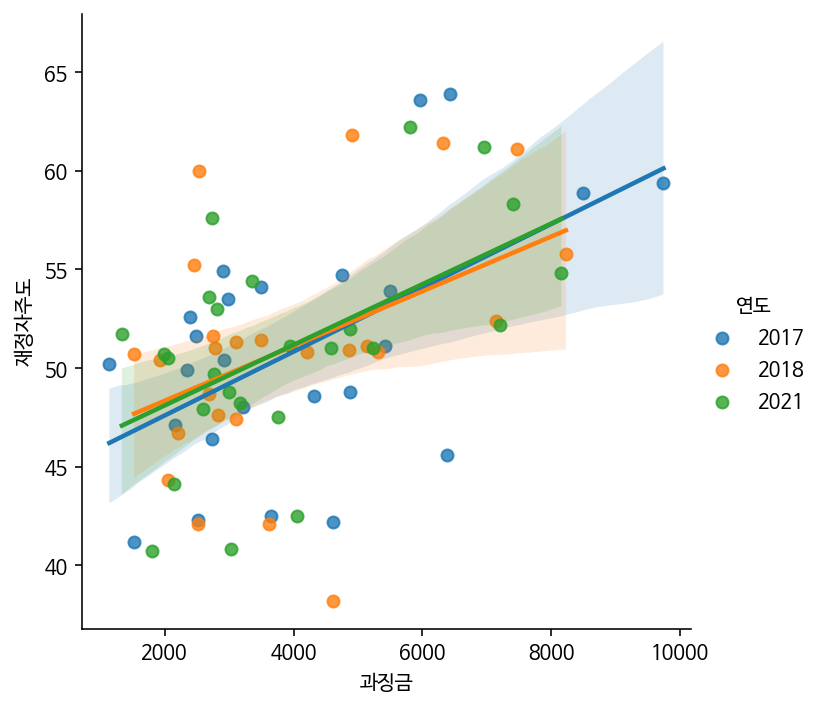

In [111]:
df_north_2017 = df_north[df_north["연도"]==2017]
df_south_2018 = df_north[df_north["연도"]==2018]
df_south_2018 = df_north[df_north["연도"]==2018]

for year in df_data["연도"].unique():
  if(year == 2017 or year == 2018 or year ==2021):
    df_sn.loc[df_sn['연도'] == year, '회귀'] = 0
  else:
    df_sn.loc[df_sn['연도'] == year, '회귀'] = 1
sns.lmplot(x="과징금", y="재정자주도", hue ="연도", data=df_sn[df_sn['회귀']==0])


# 결론